In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

from planar_code import PlanarCode, PlanarLattice
from graph_operations import *
from visualization import *

L, W = (4, 4)
#p = np.full((L,W,2), 0.1)
#p_dual = np.full((L-1,W+1,2), 0.05)
p=0.1
p_dual=0.1
planar_code = PlanarCode(L=L, W=W, p=p, p_dual=p_dual, boundaries=np.array((1,0), dtype=int))

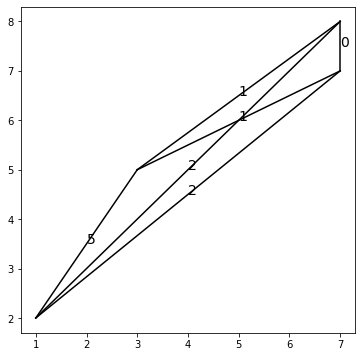

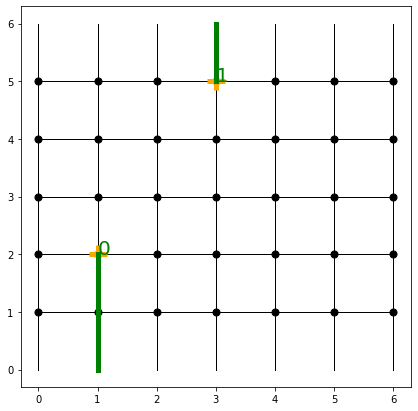

In [3]:
# Test error correction for every possible length-1 error
planar_code = PlanarCode(L=7, W=7, p=0.05, boundaries=np.array((1,0), dtype=int))
lattice = planar_code.primal
lattice.apply_edge_operator((1,[0,1],1))
lattice.apply_edge_operator((3,5,1))
syndrome = lattice.measure_syndrome()
graph = syndrome_to_matching_graph(lattice, syndrome, pathfinding='manhattan')[0]
fig, ax = plt.subplots(1, 1, figsize=(6,6))
ax.grid(False)
for v0, v1, weight in graph.edges.data('weight'):
    v0x, v0y = v0
    v1x, v1y = v1
    ax.plot((v0x, v1x), (v0y, v1y), 'k-')
    ax.text((v0x+v1x)/2, (v0y+v1y)/2, str(weight), fontsize=14)
plot_matchings(lattice, syndrome, pathfinding='manhattan')

In [8]:
import itertools

planar_code = PlanarCode(L=7, W=7, p=0.05, boundaries=np.array((1,0), dtype=int))
lattice = planar_code.primal
L, W, D = lattice.edges.shape
edges = itertools.product(range(L), range(W), range(D))
max_len_3_errors = itertools.combinations(edges, r=3)

bad_error_chains = []
for errors in tqdm(max_len_3_errors, total=152096):
    lattice.reset()
    prev = errors[0]
    for edge in errors:
        lattice.apply_edge_operator(edge)
        prev = edge
    syndrome = lattice.measure_syndrome()
    matching, paths = min_weight_syndrome_matching(lattice, syndrome, pathfinding='manhattan')
    for path in paths:
        lattice.apply_edge_operators(path)
    try:
        logical_errors = lattice.detect_logical_errors()
        if logical_errors > 0:
            bad_error_chains.append(errors)
    except:
        print(paths)
        plot_planar_code(planar_code, plot_dual=False, show_errors=True, show_syndrome=True)

  0%|          | 0/152096 [00:00<?, ?it/s]

70


/mnt/e/Google Drive Sync/School Stuffs/Honours Thesis/PlanarCode/visualization.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(


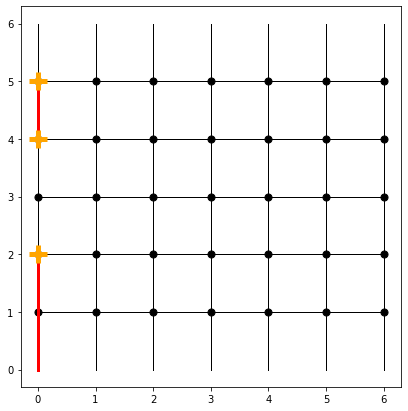

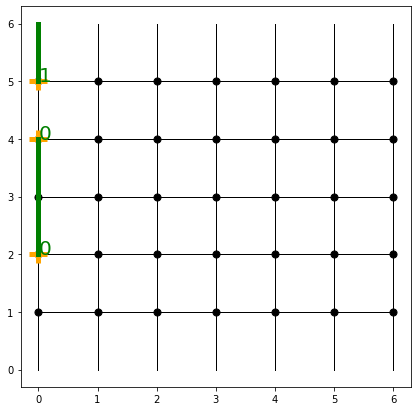

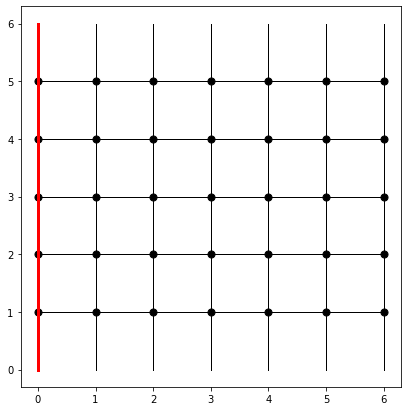

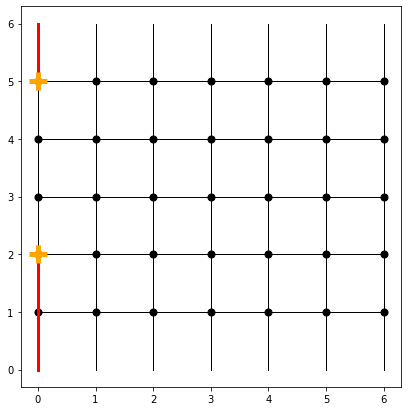

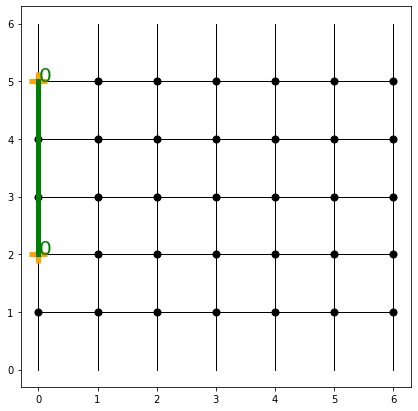

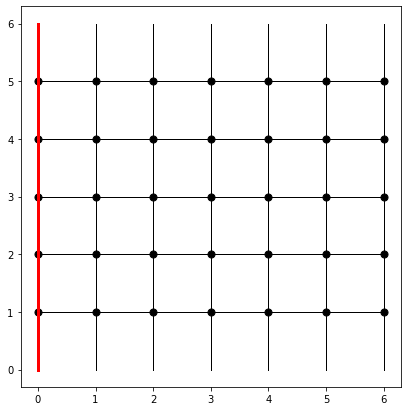

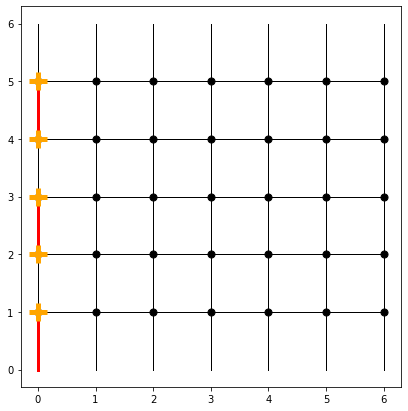

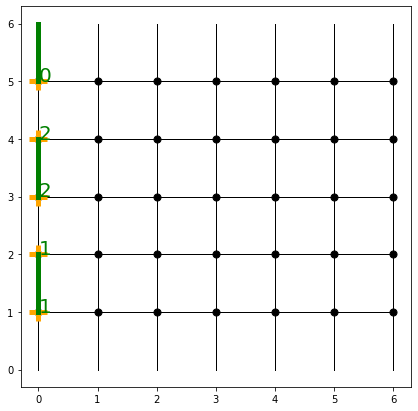

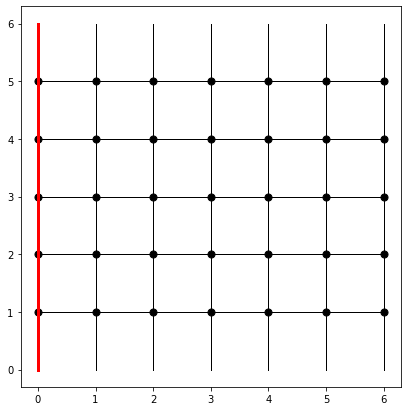

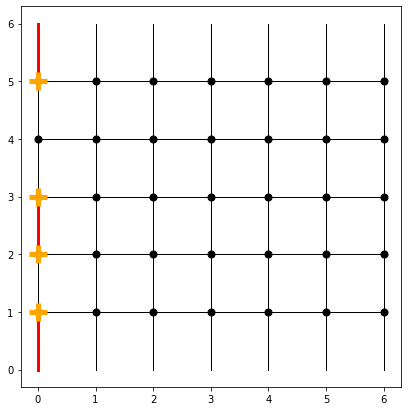

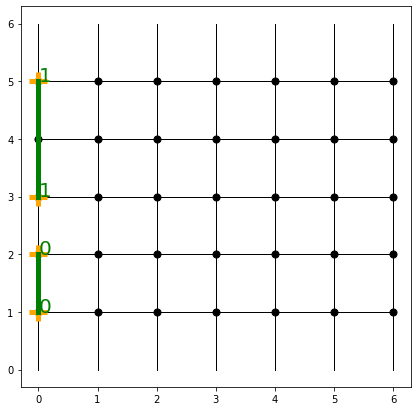

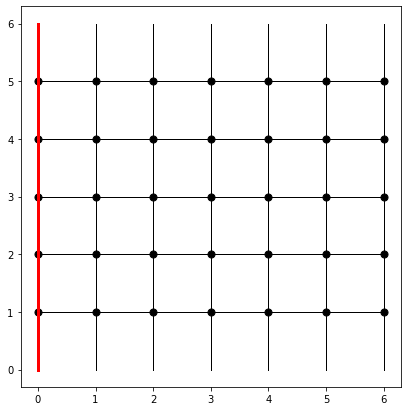

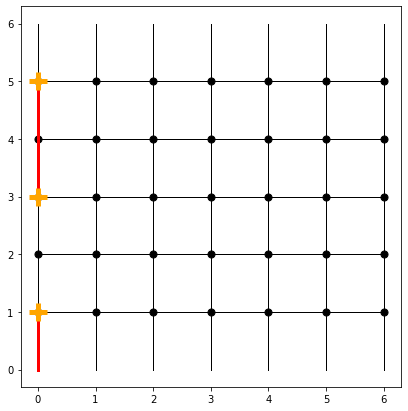

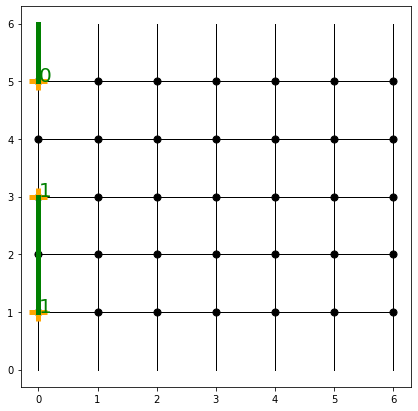

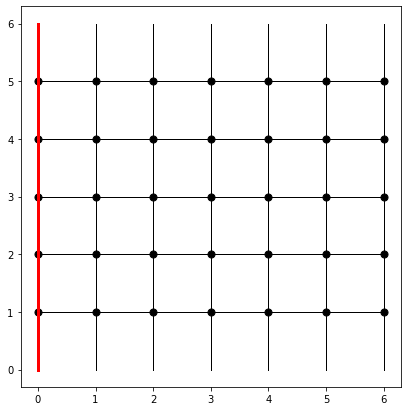

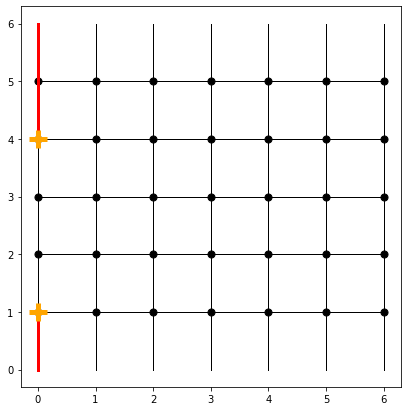

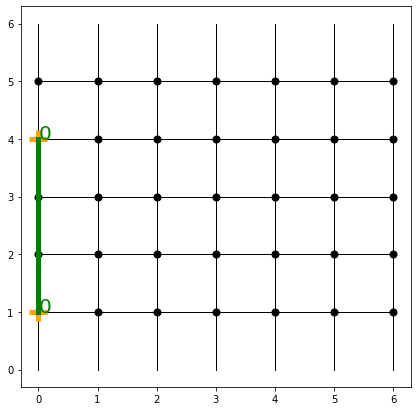

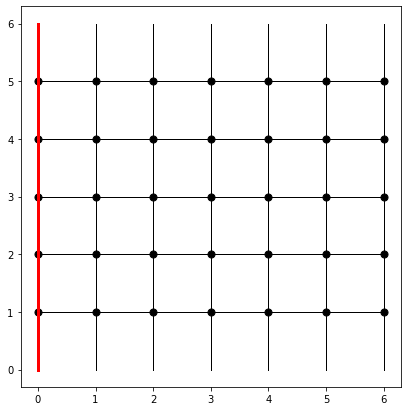

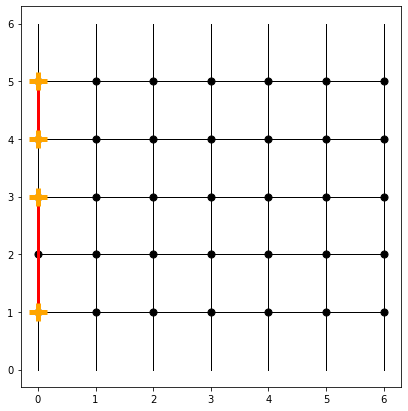

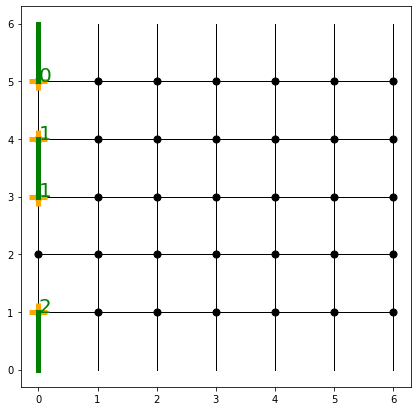

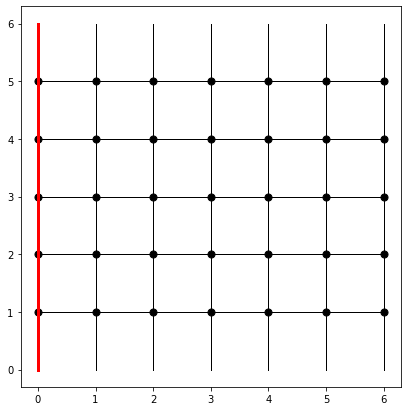

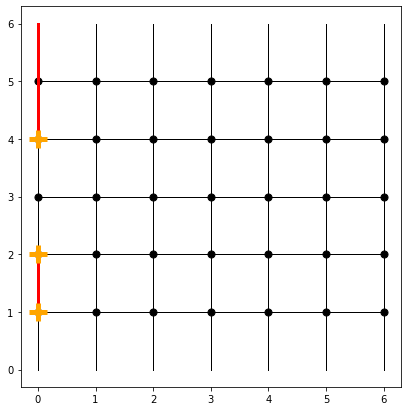

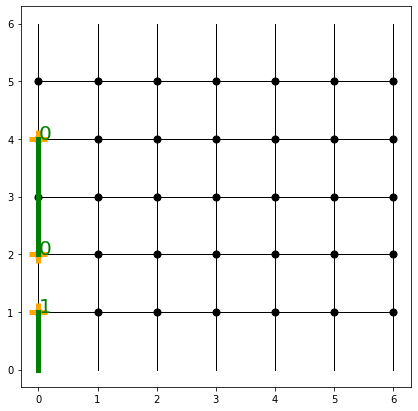

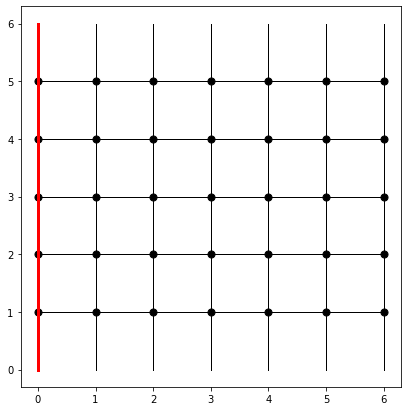

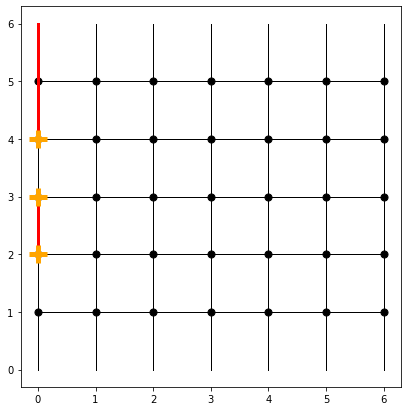

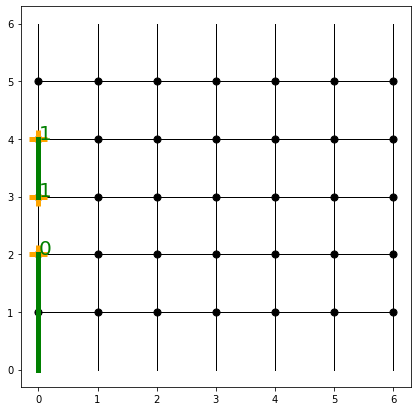

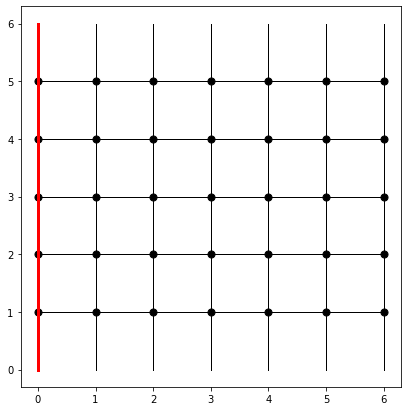

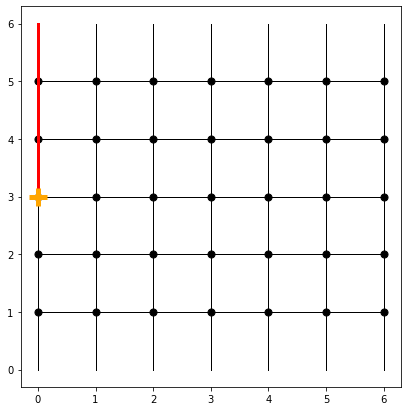

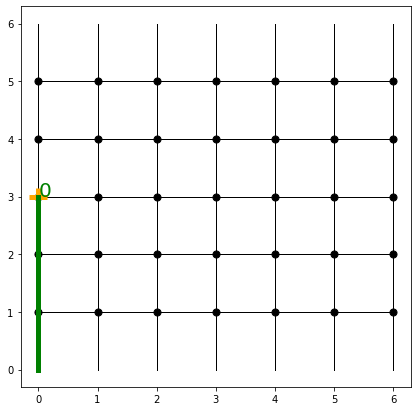

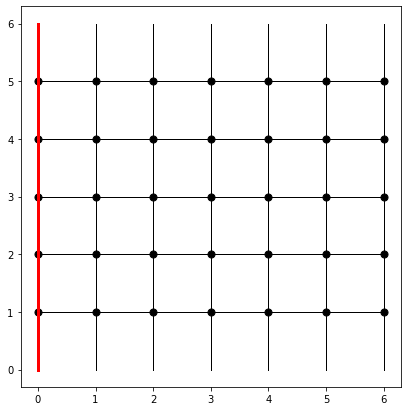

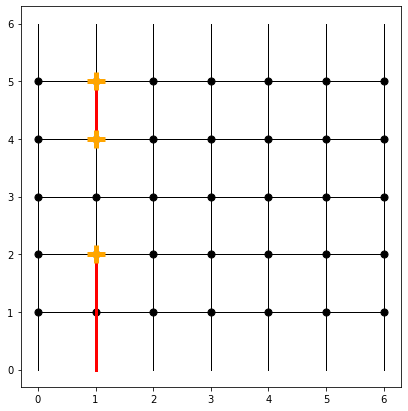

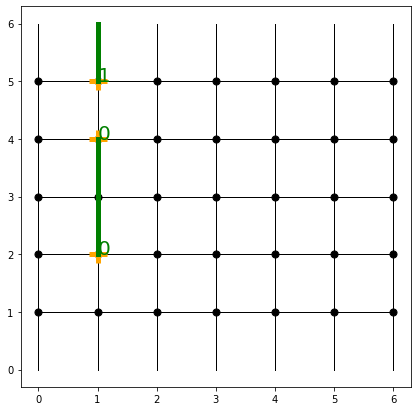

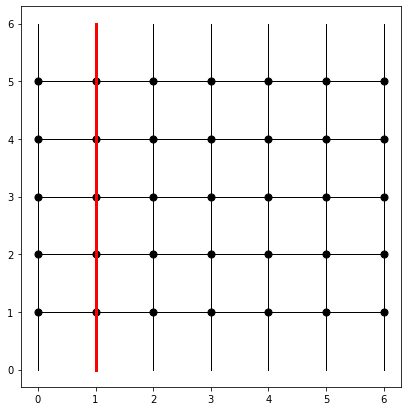

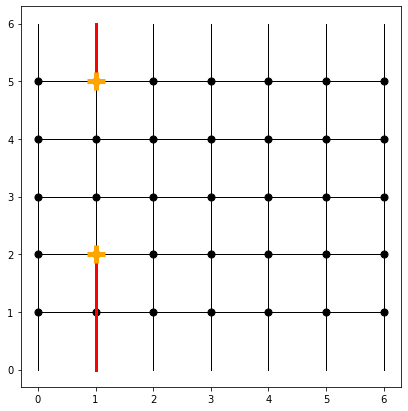

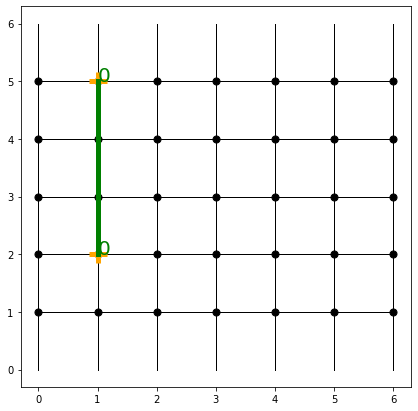

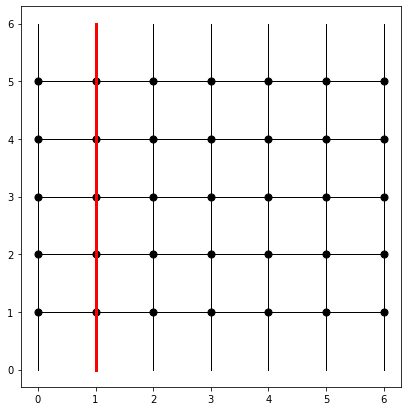

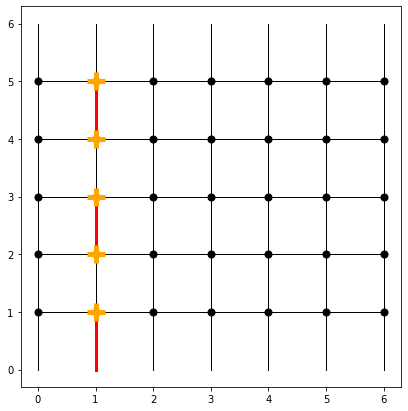

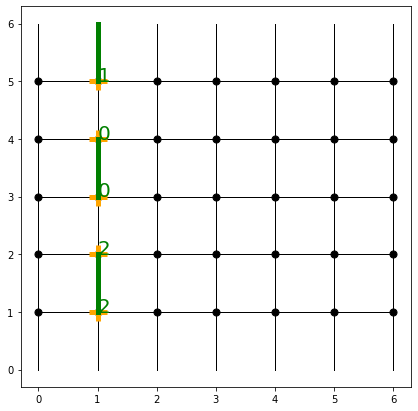

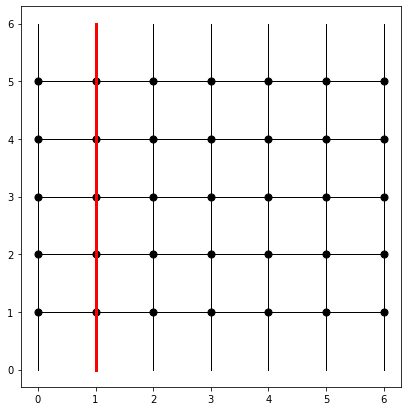

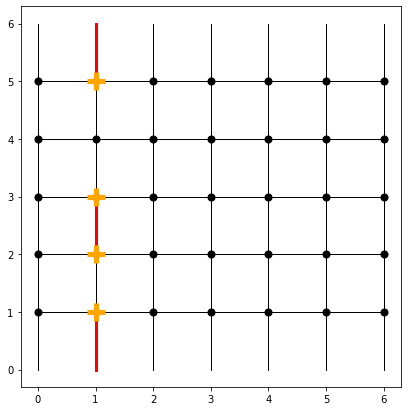

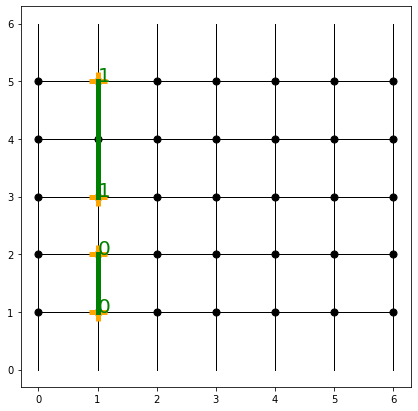

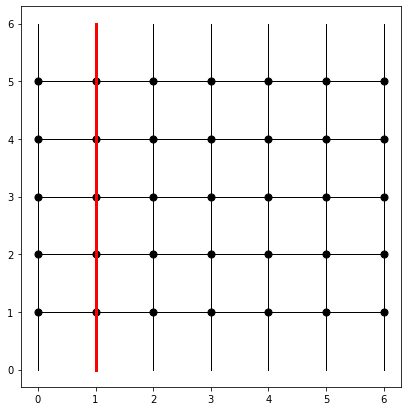

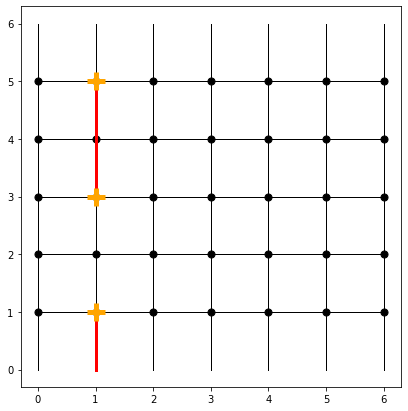

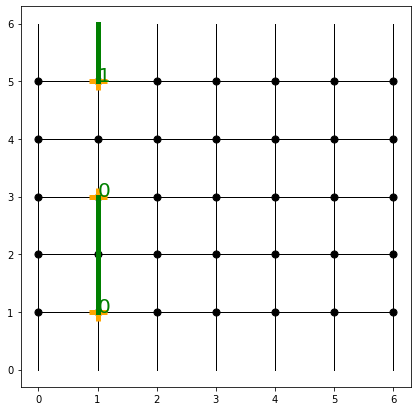

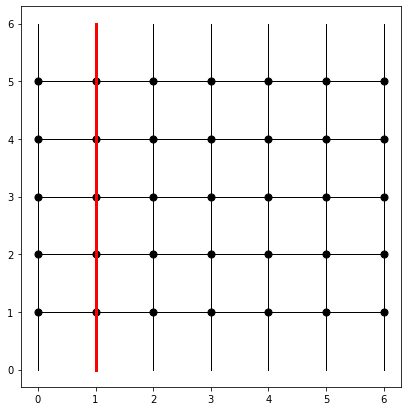

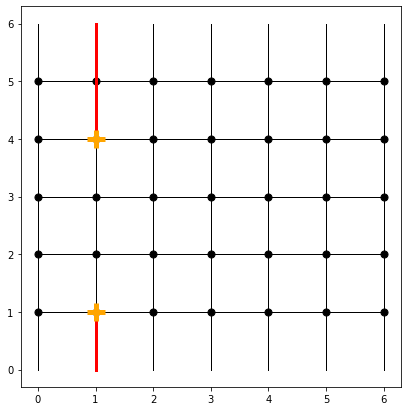

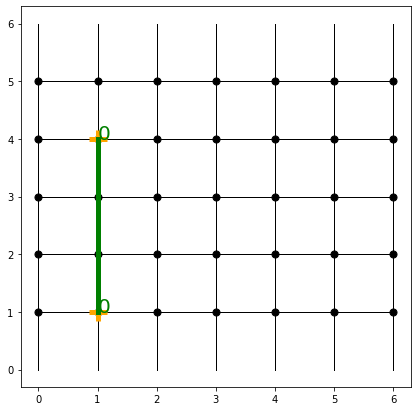

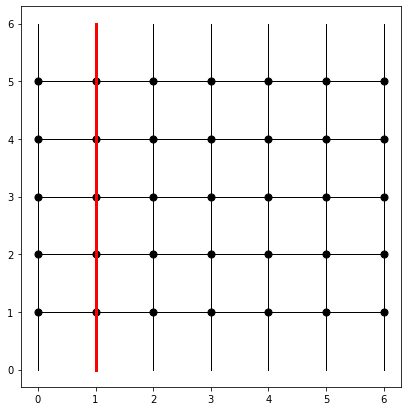

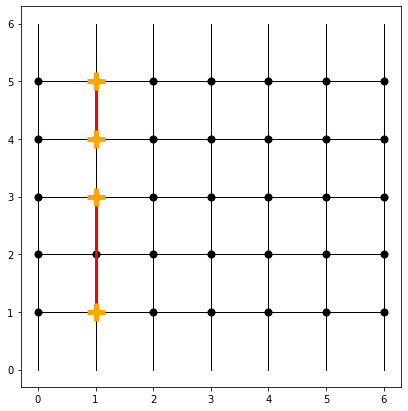

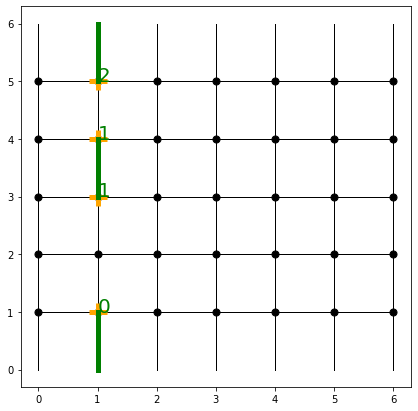

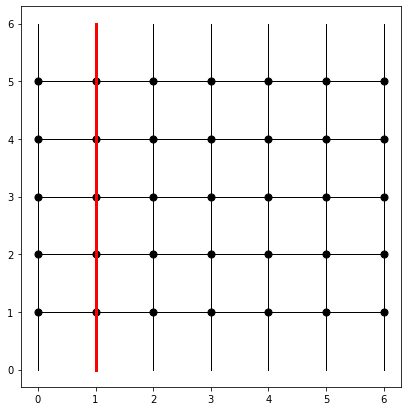

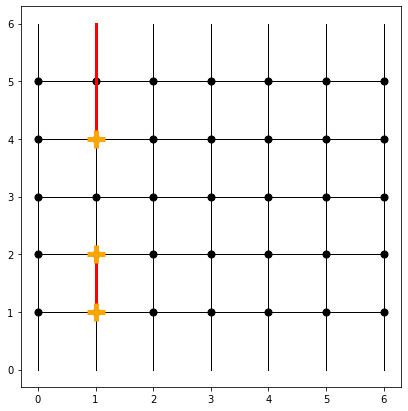

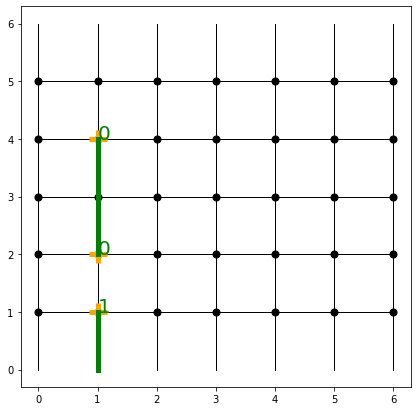

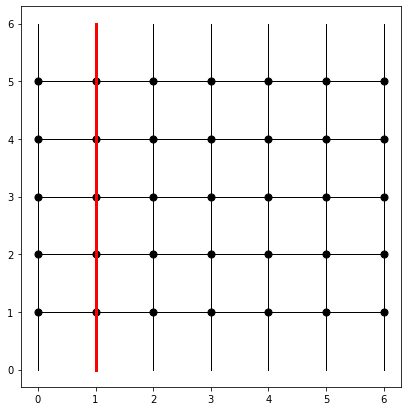

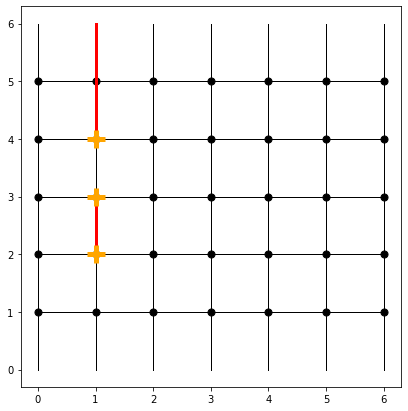

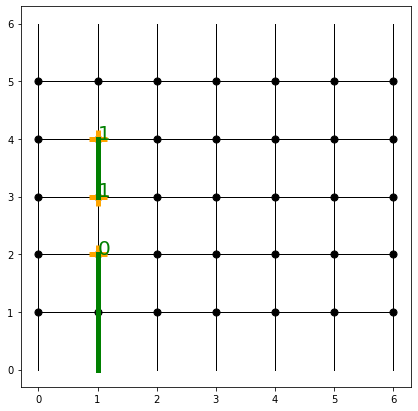

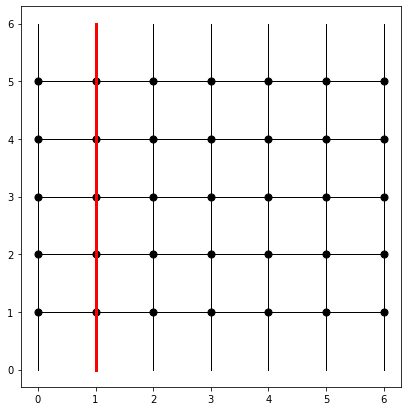

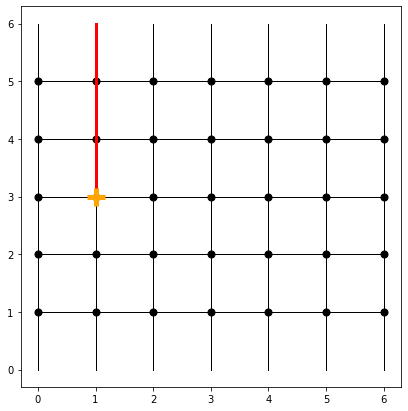

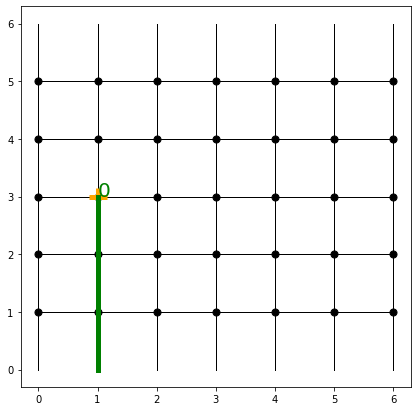

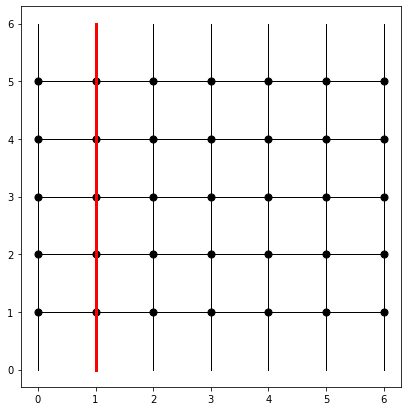

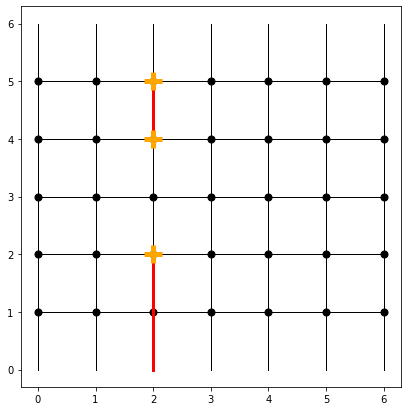

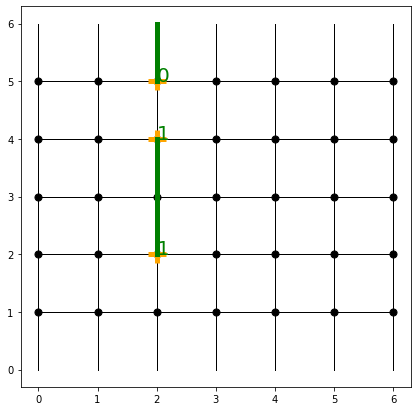

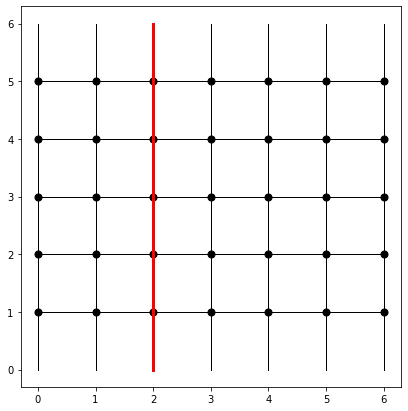

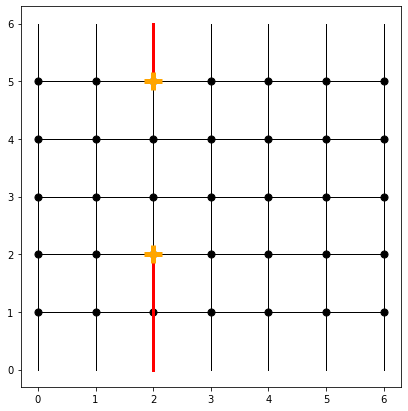

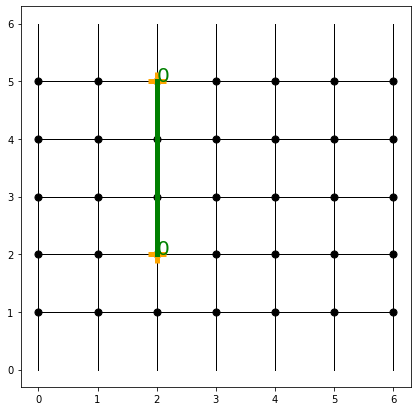

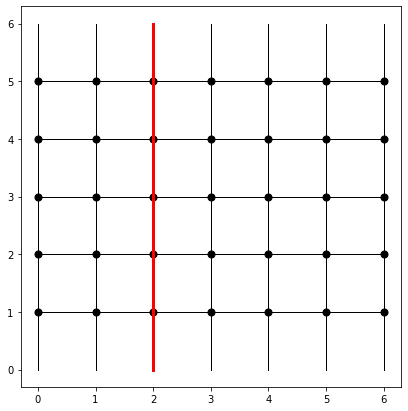

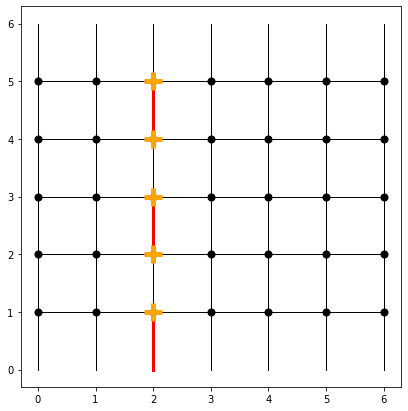

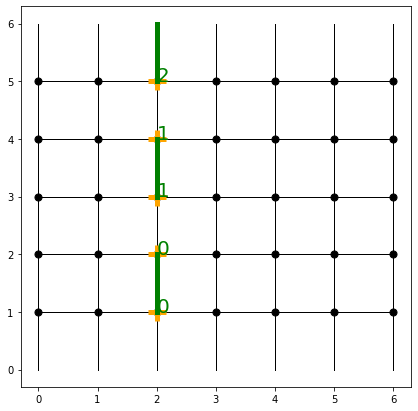

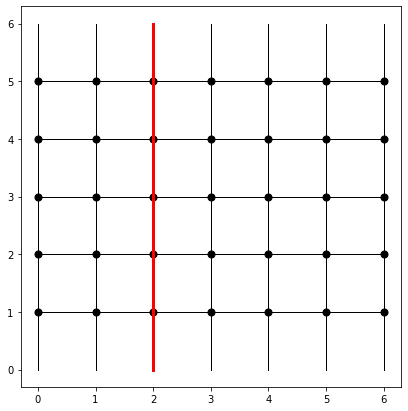

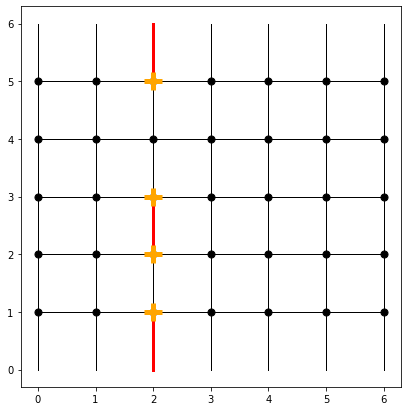

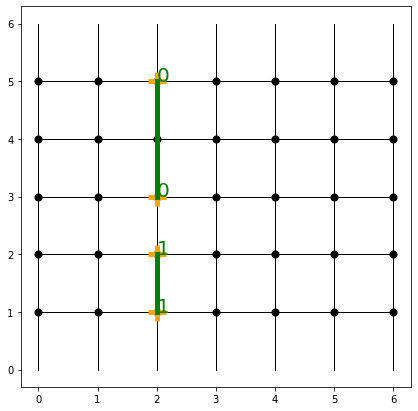

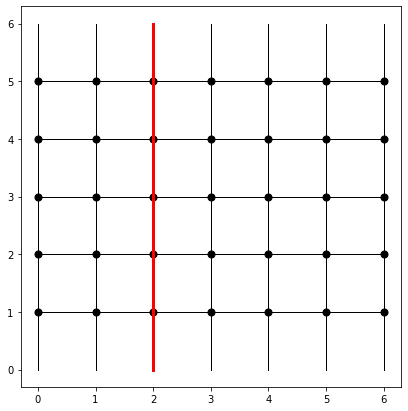

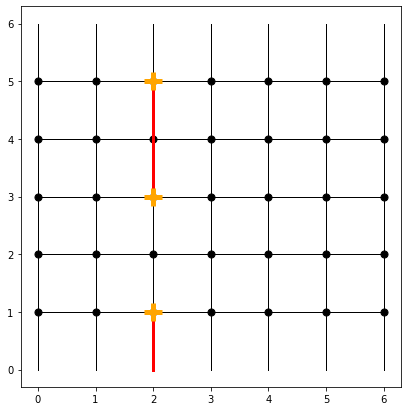

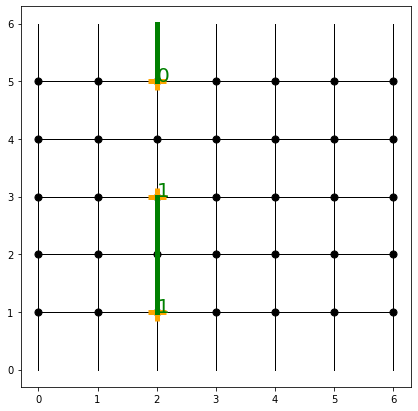

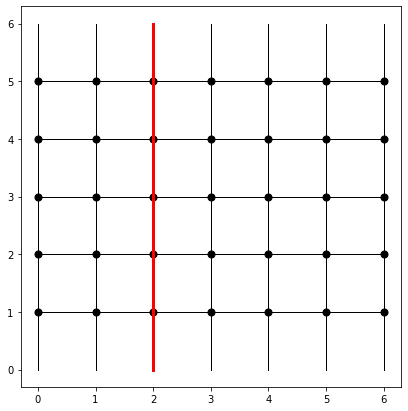

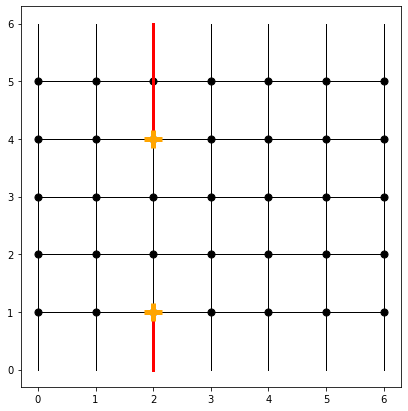

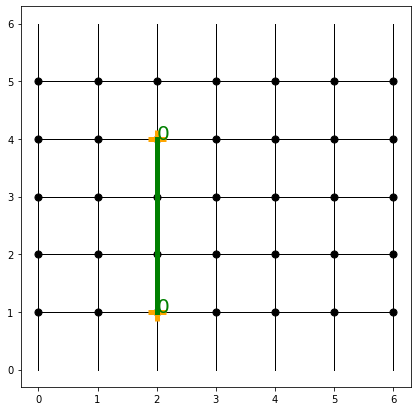

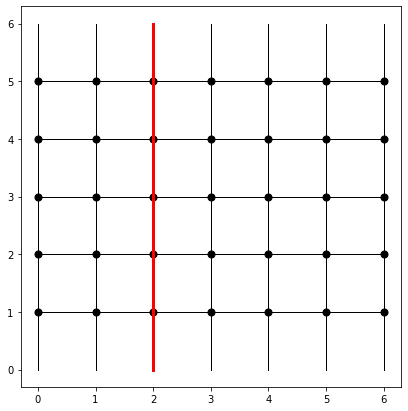

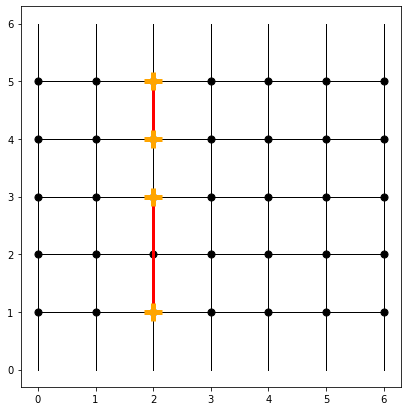

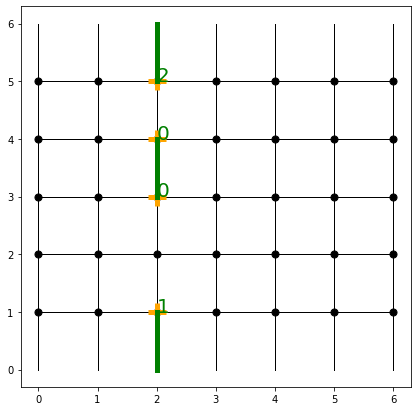

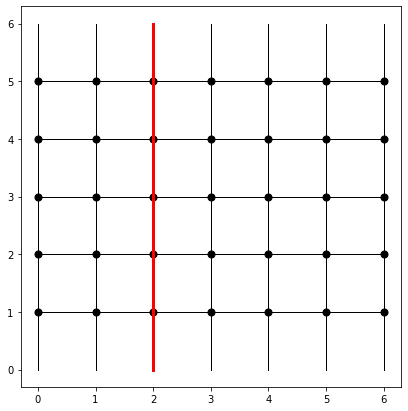

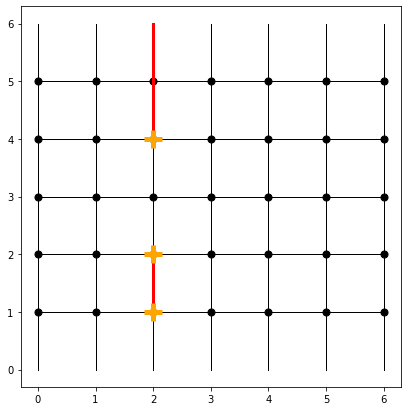

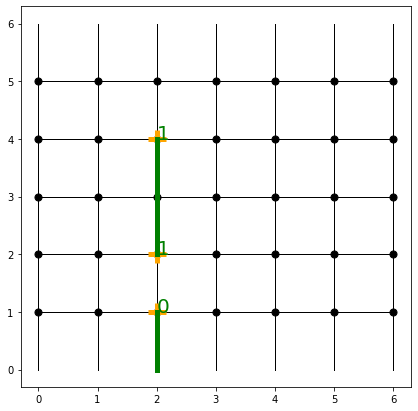

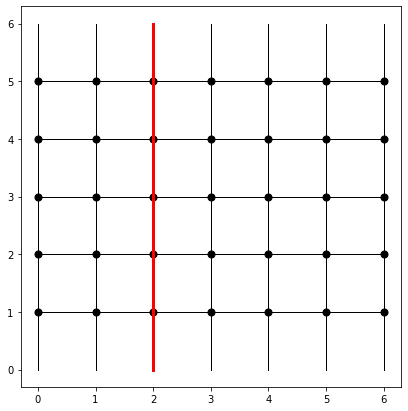

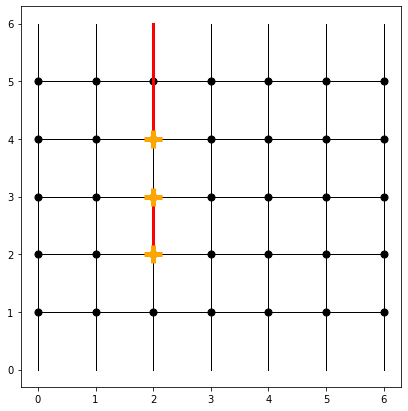

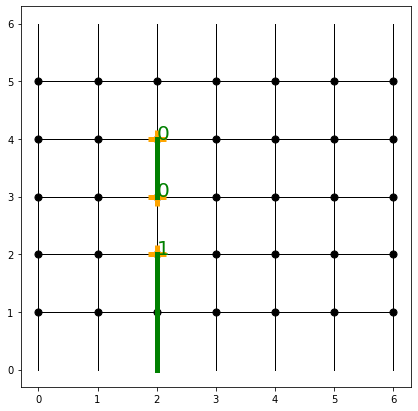

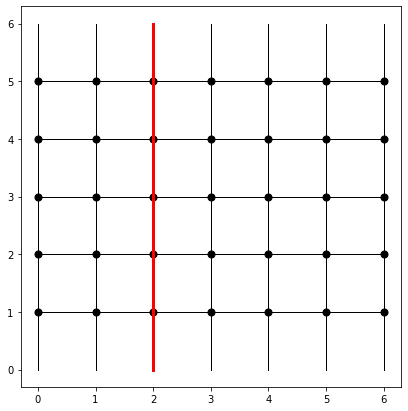

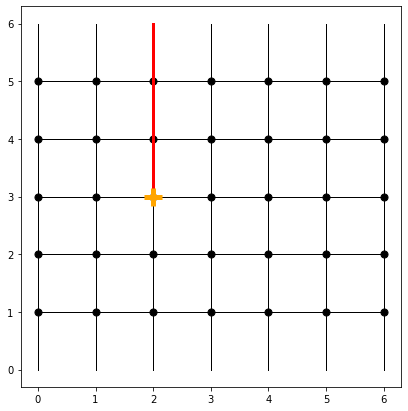

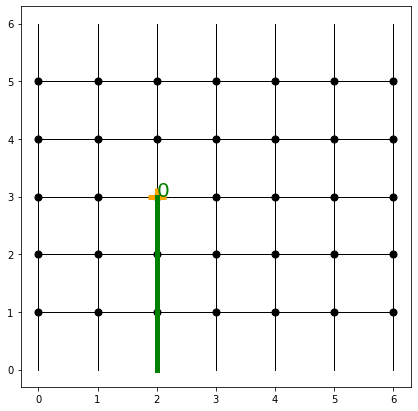

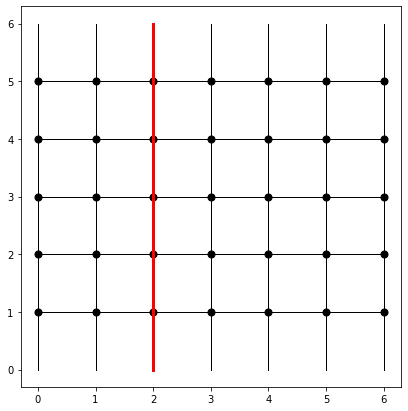

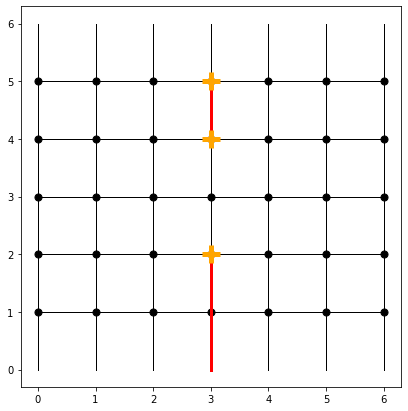

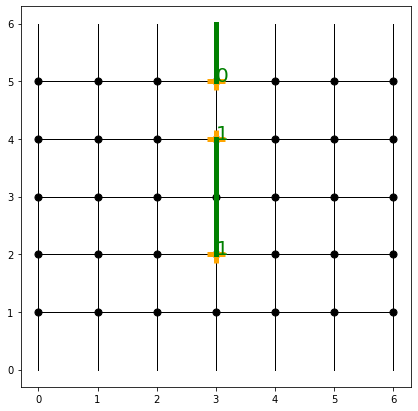

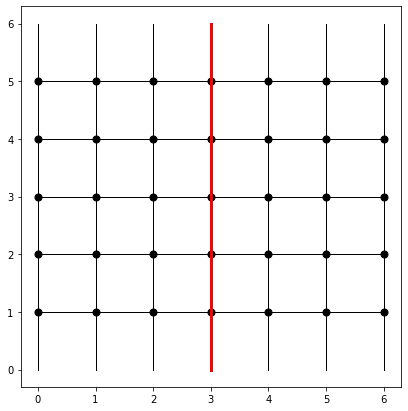

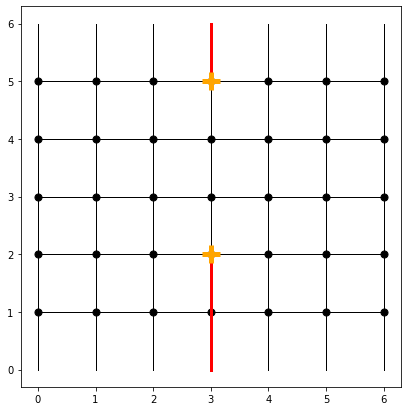

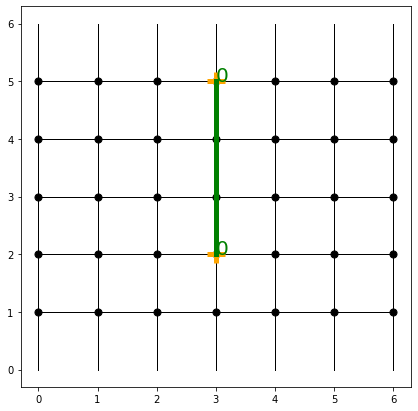

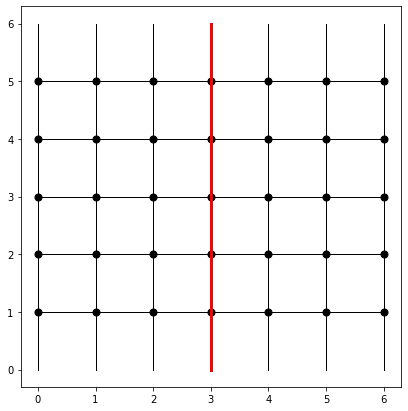

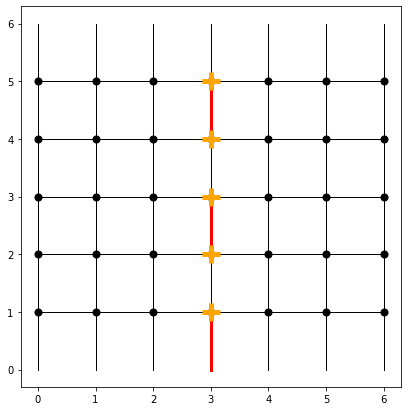

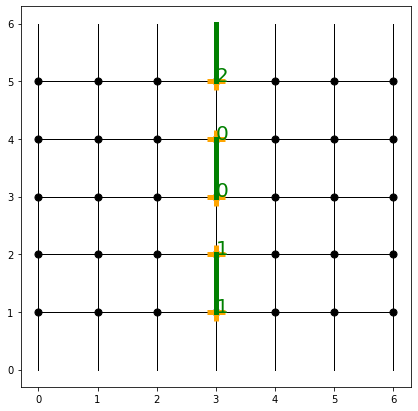

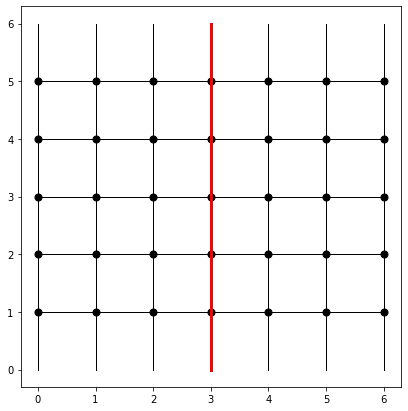

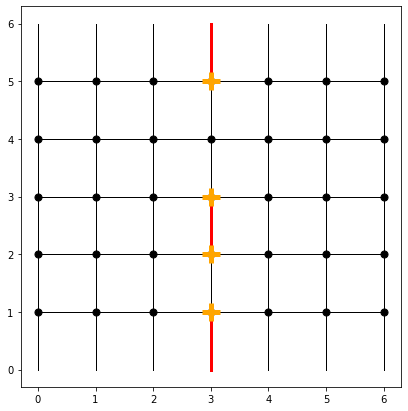

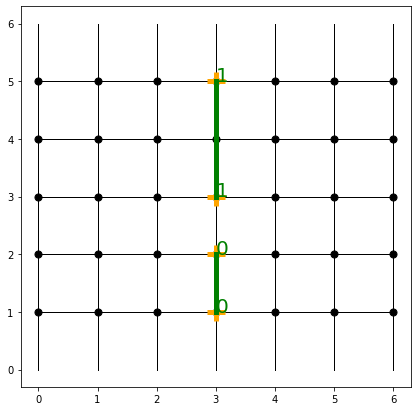

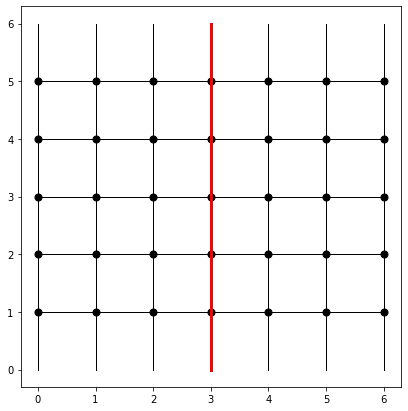

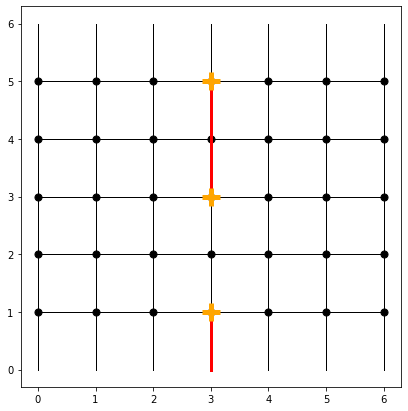

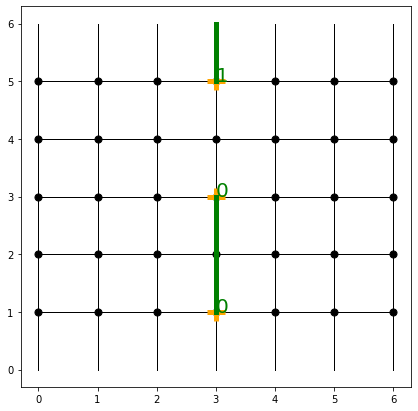

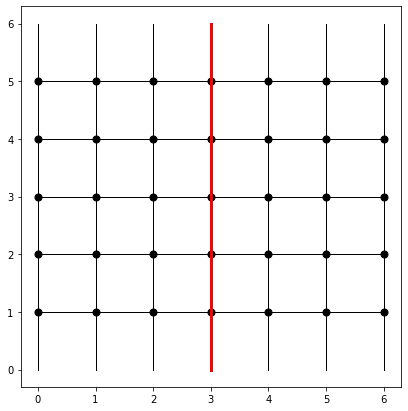

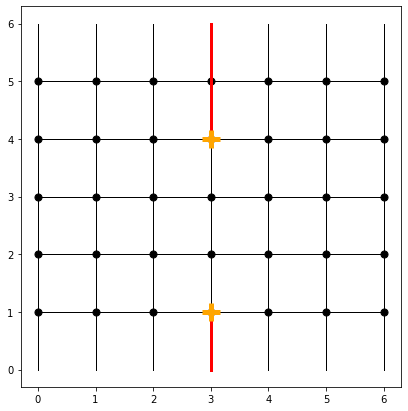

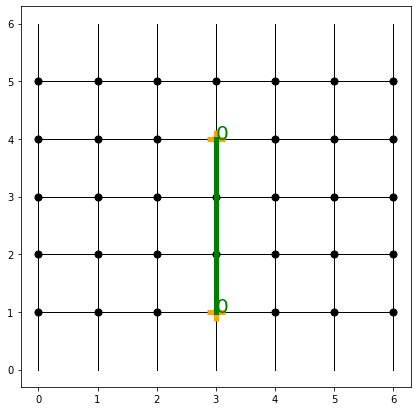

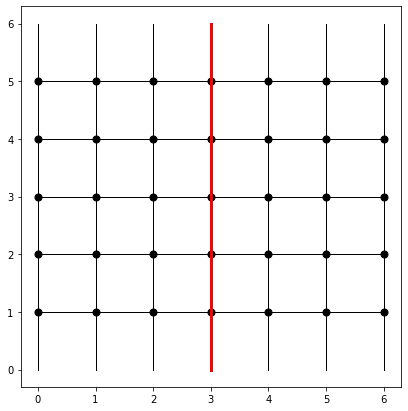

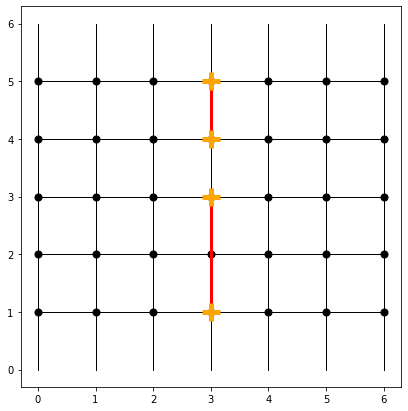

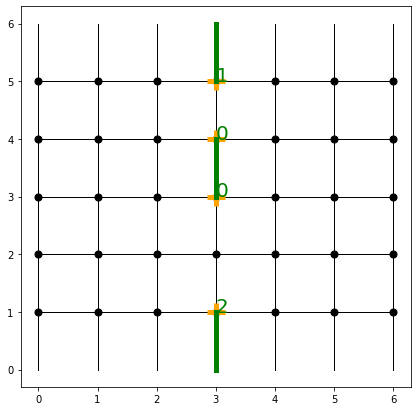

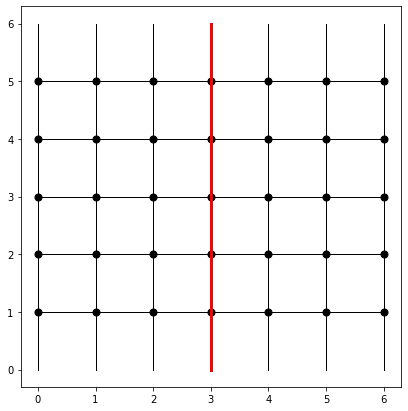

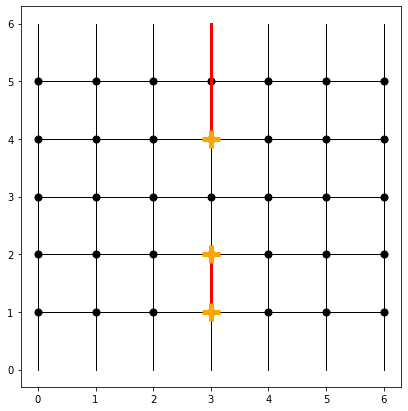

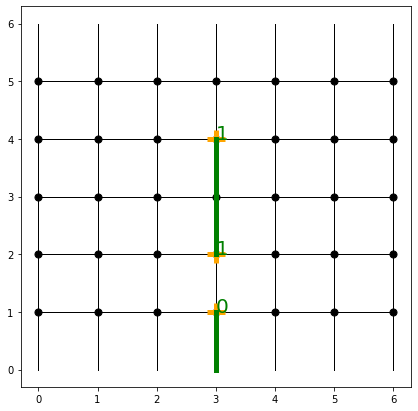

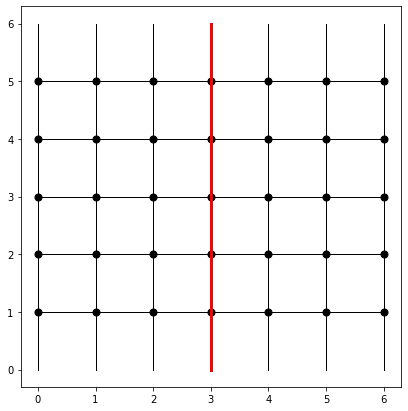

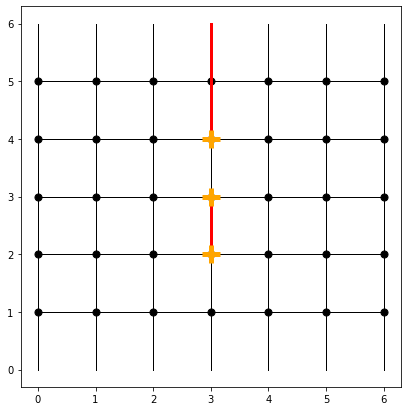

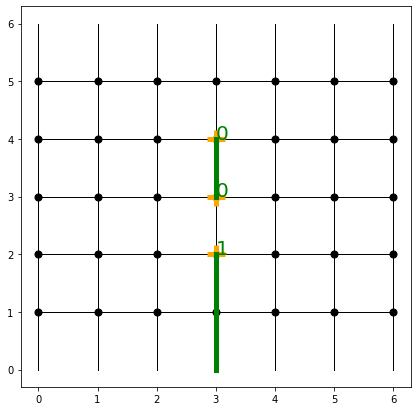

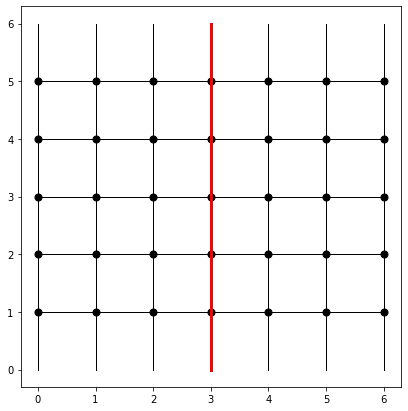

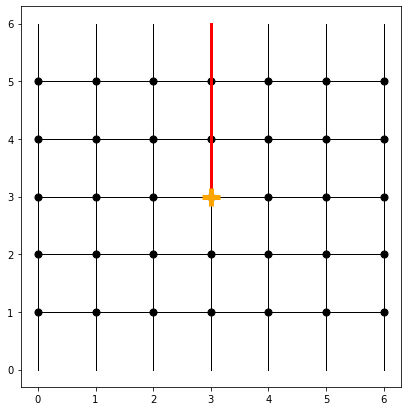

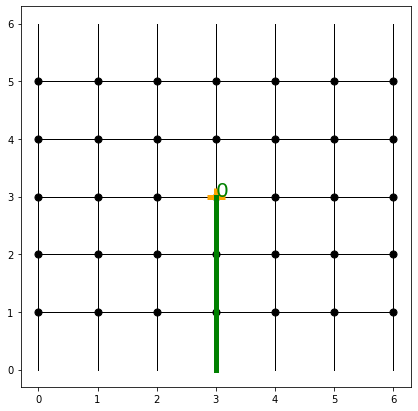

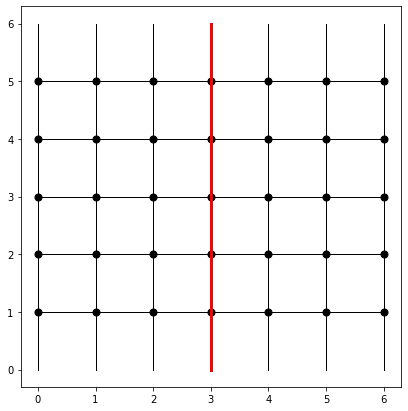

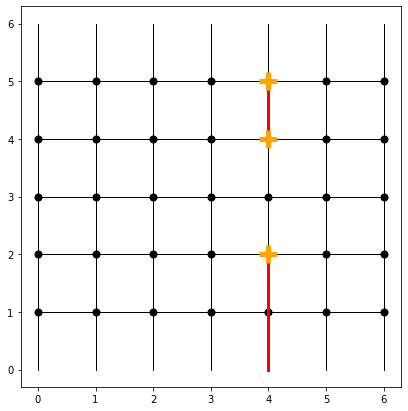

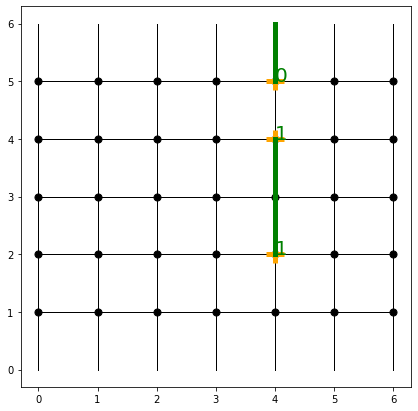

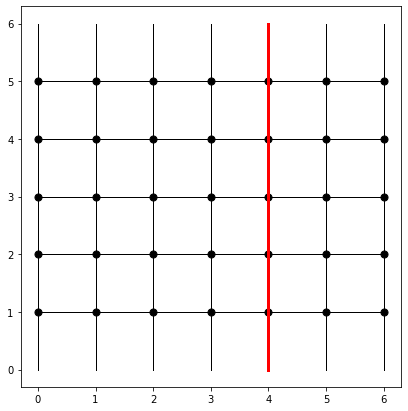

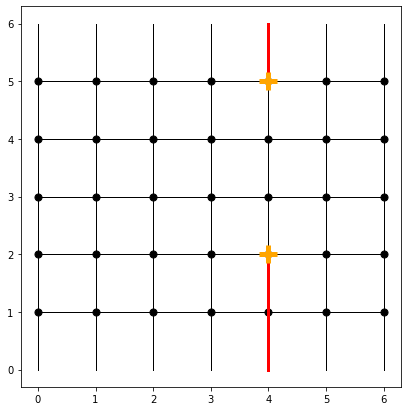

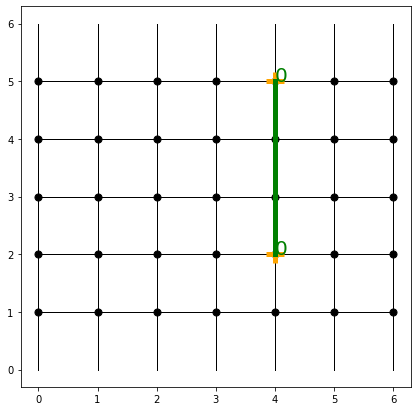

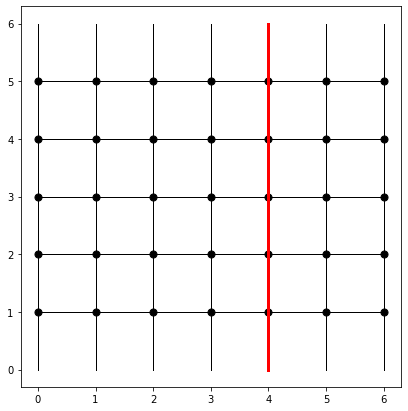

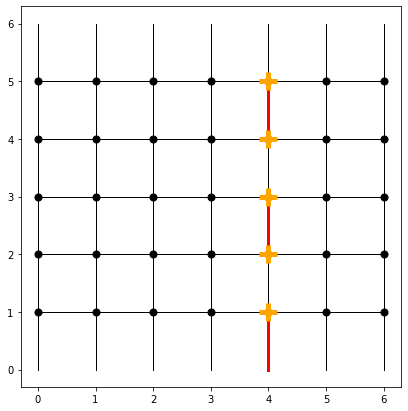

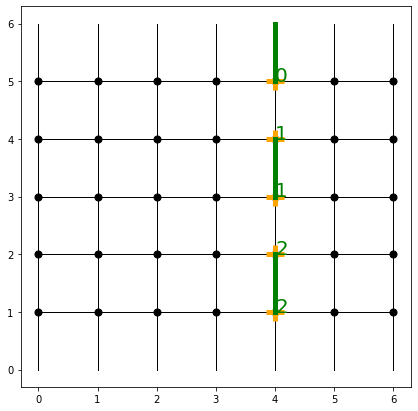

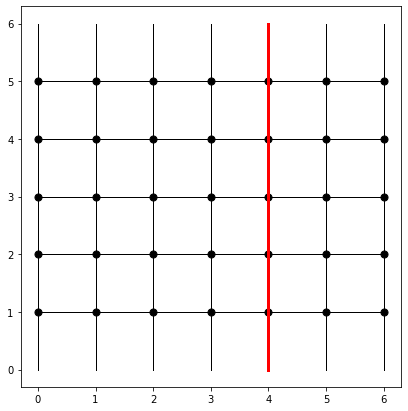

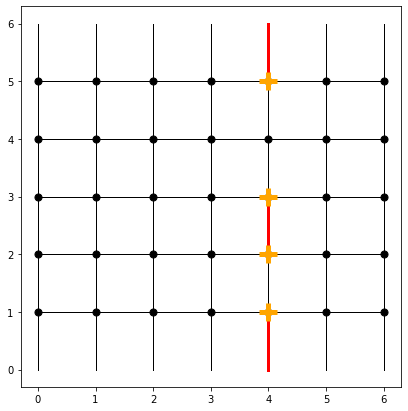

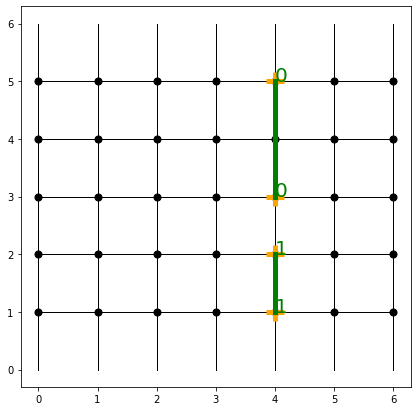

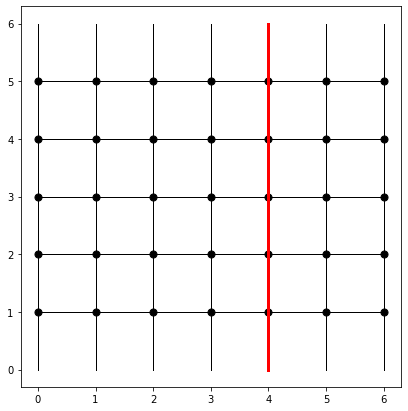

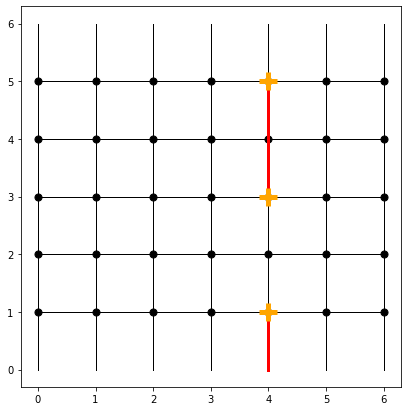

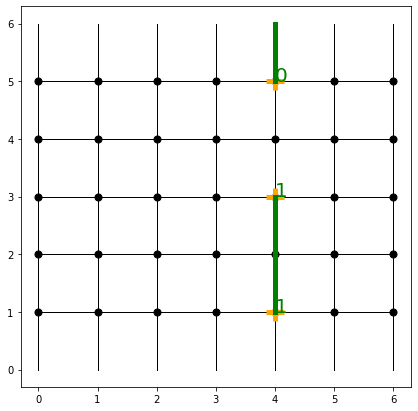

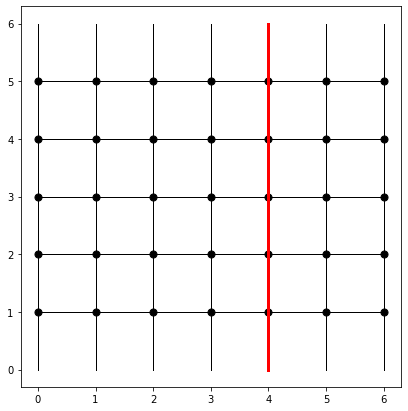

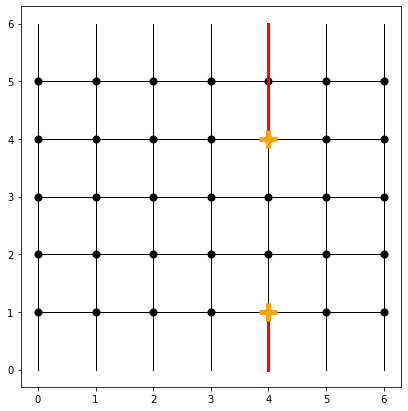

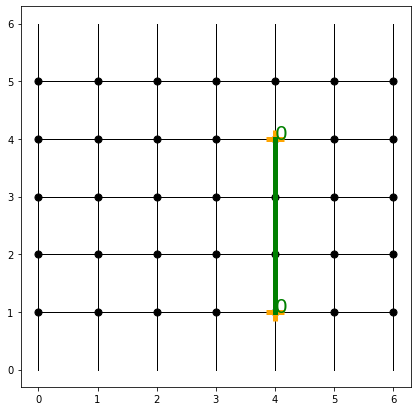

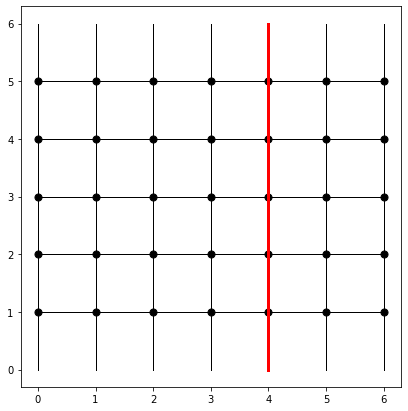

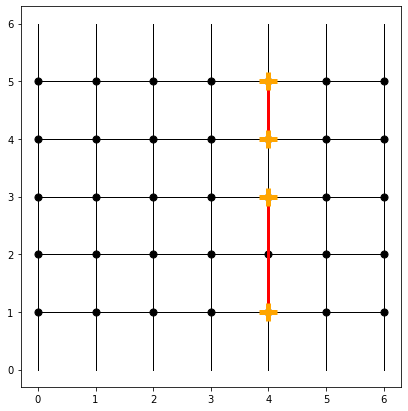

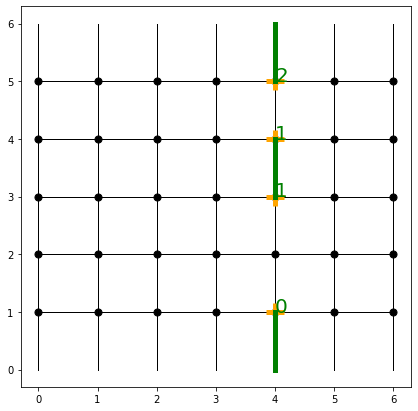

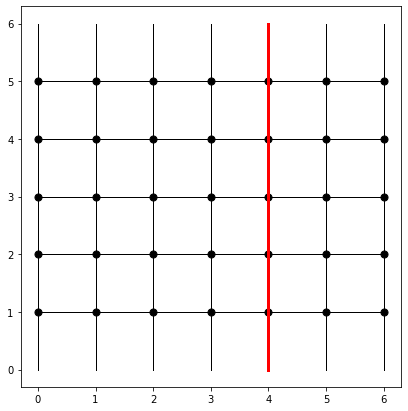

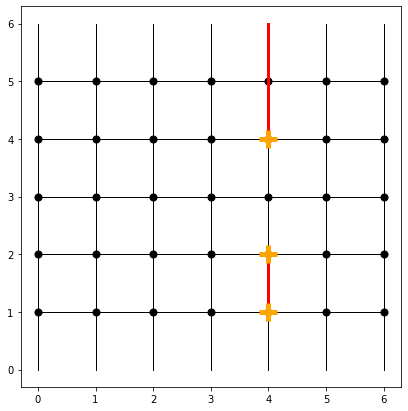

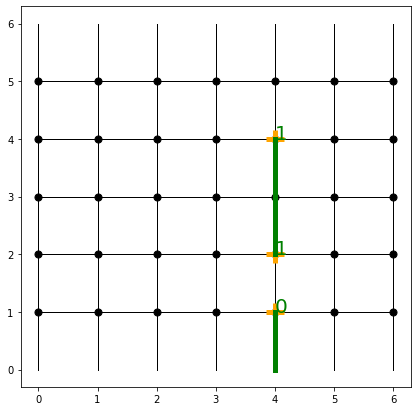

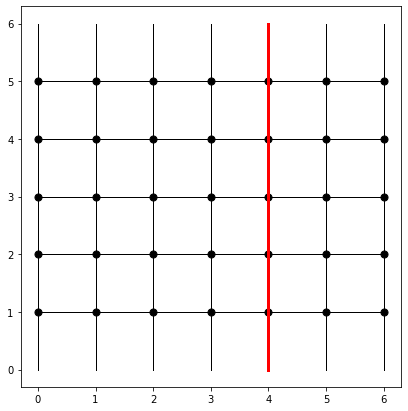

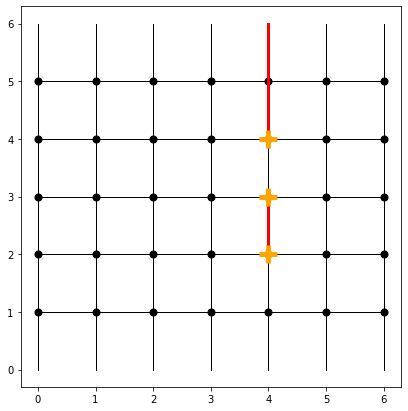

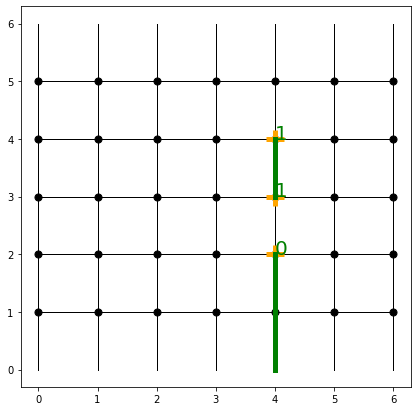

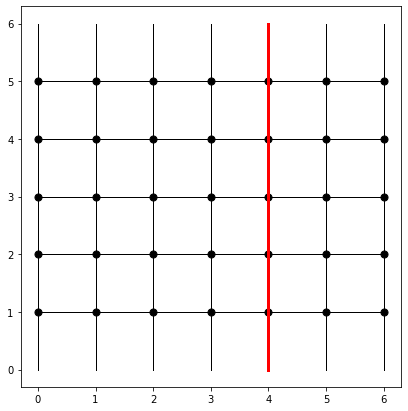

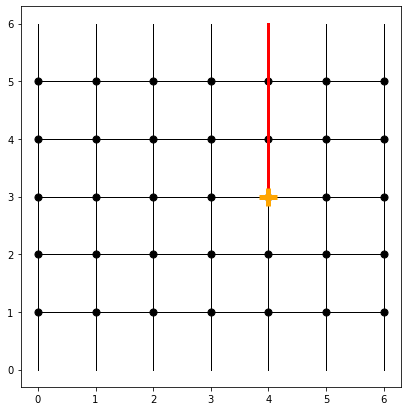

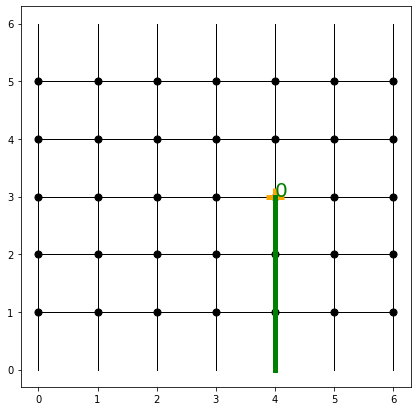

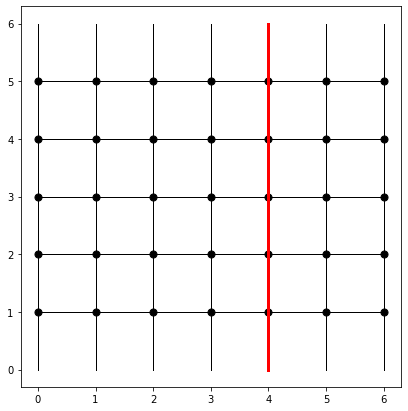

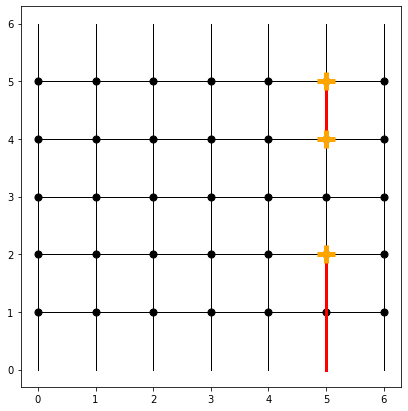

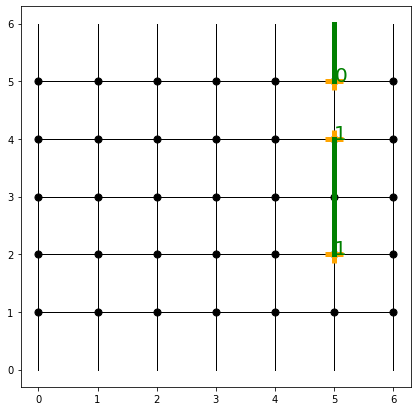

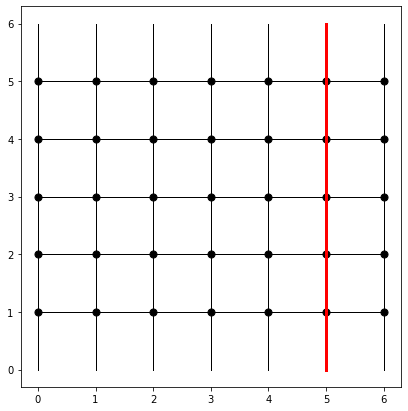

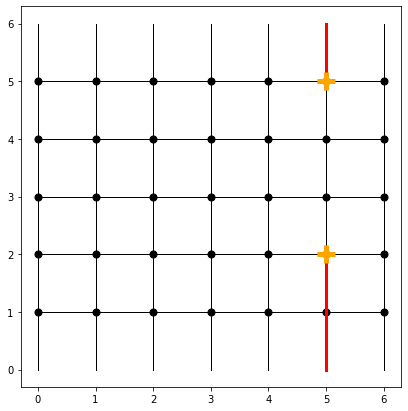

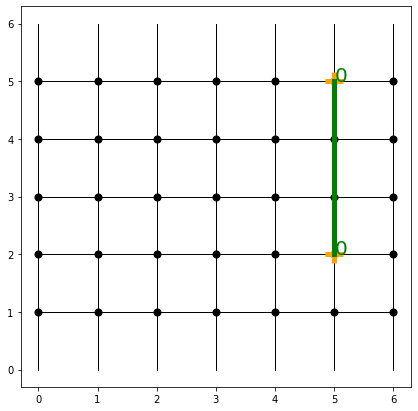

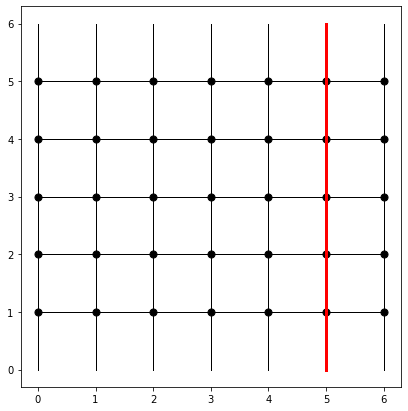

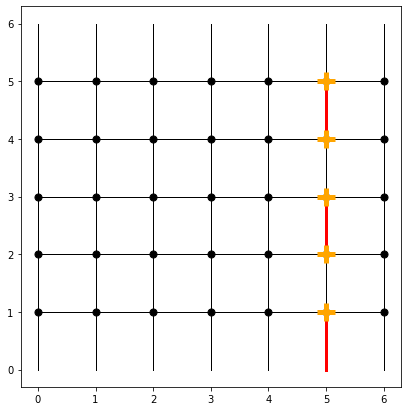

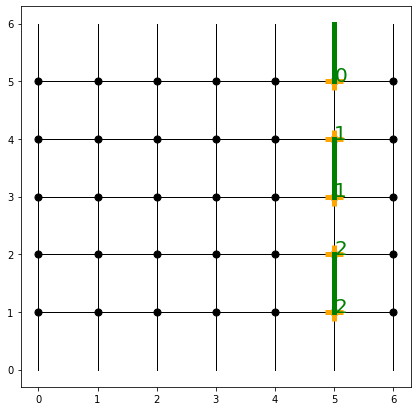

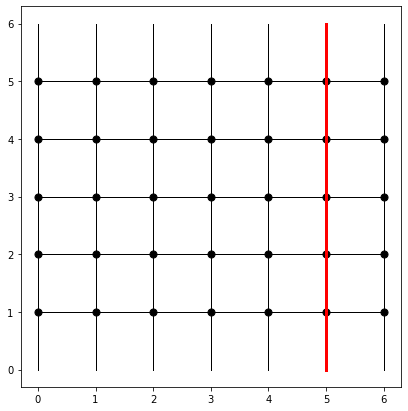

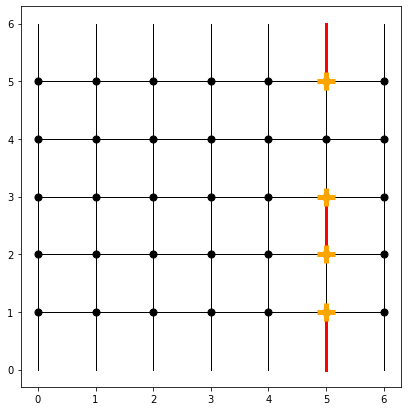

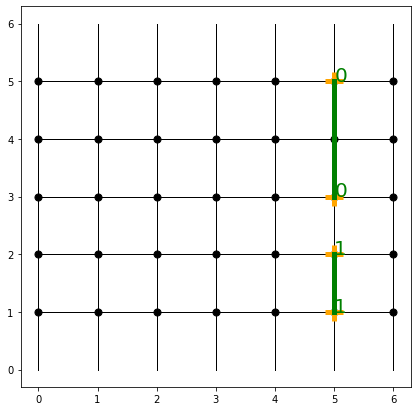

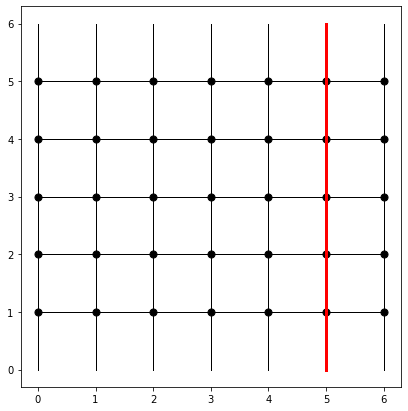

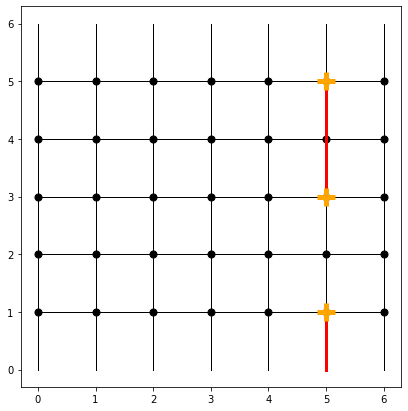

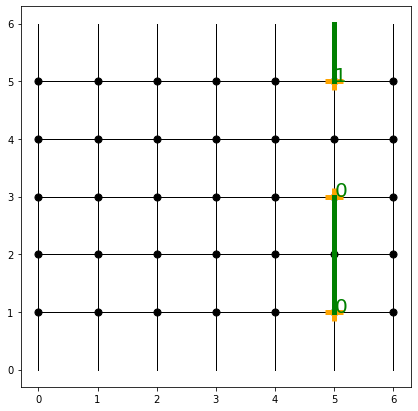

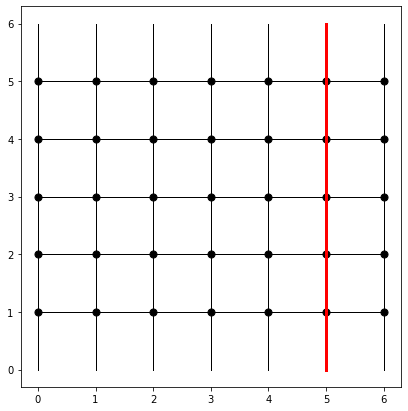

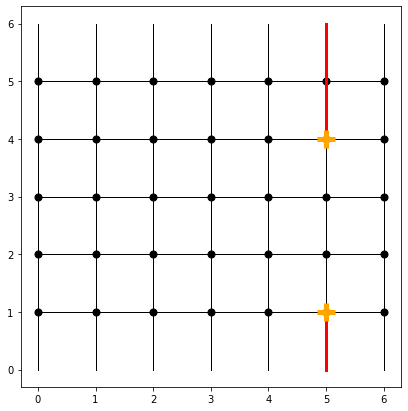

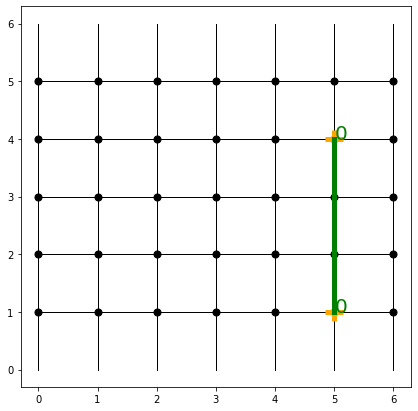

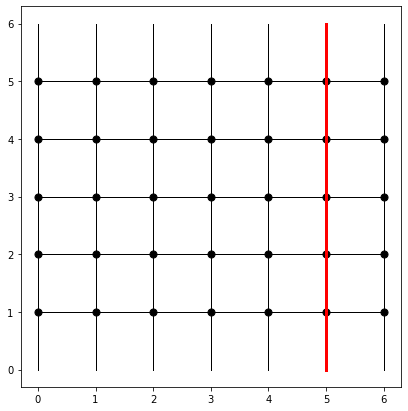

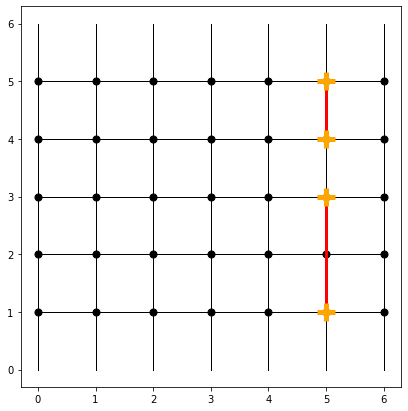

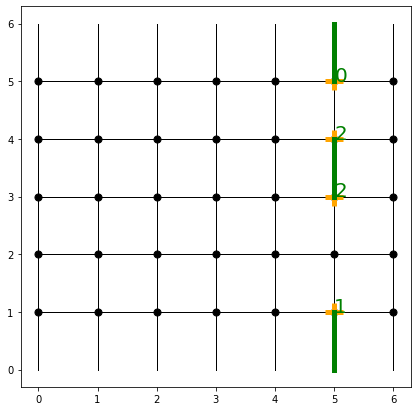

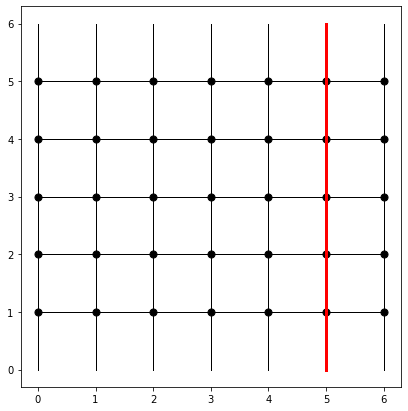

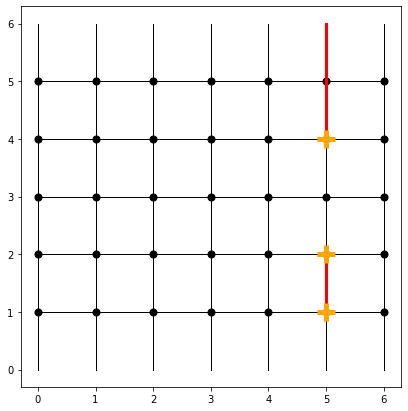

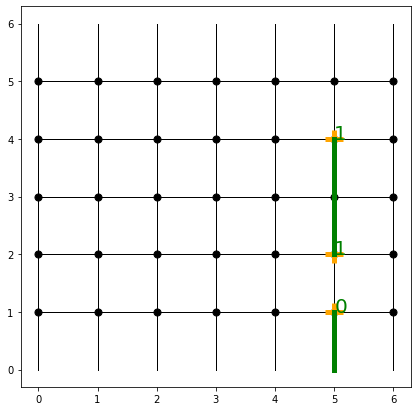

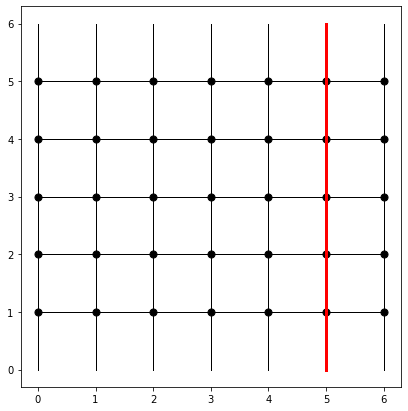

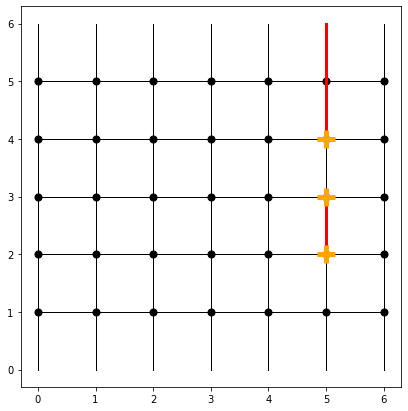

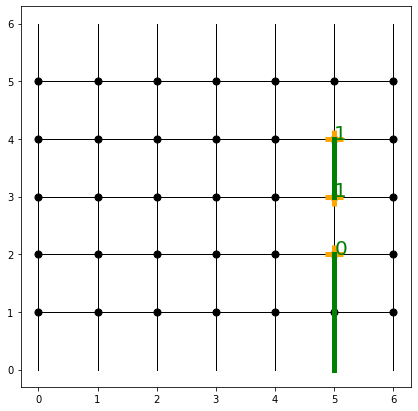

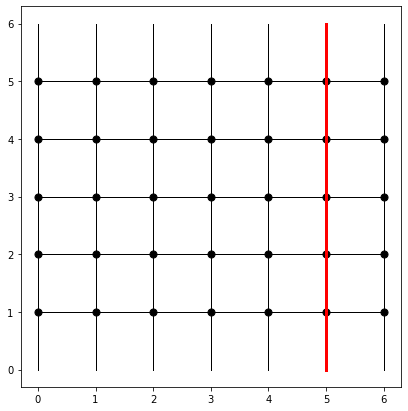

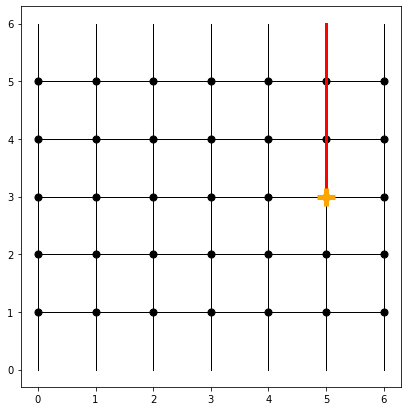

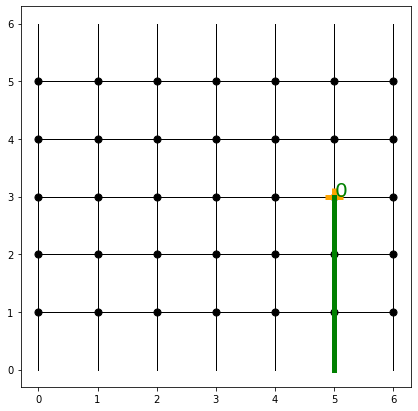

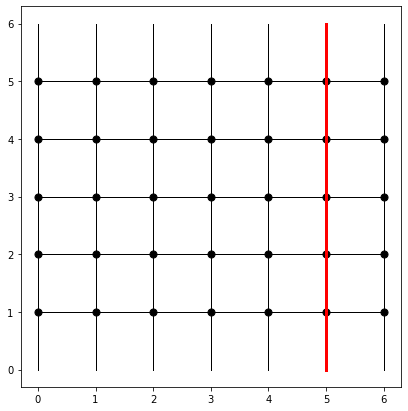

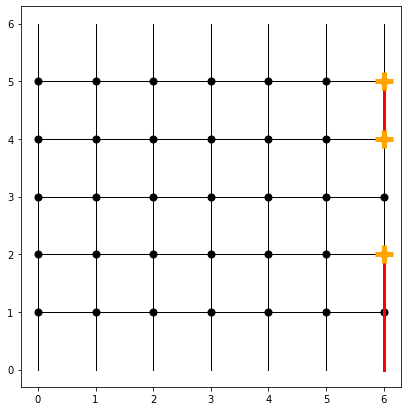

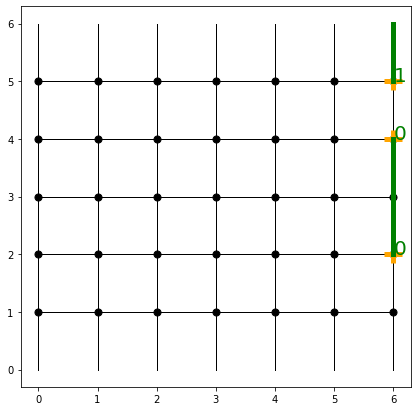

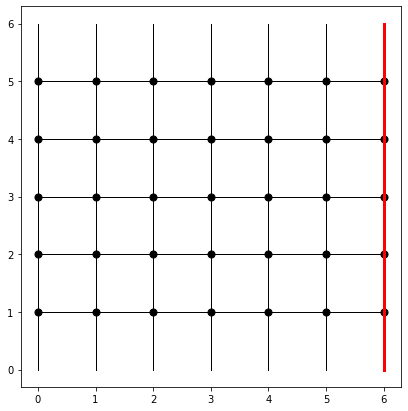

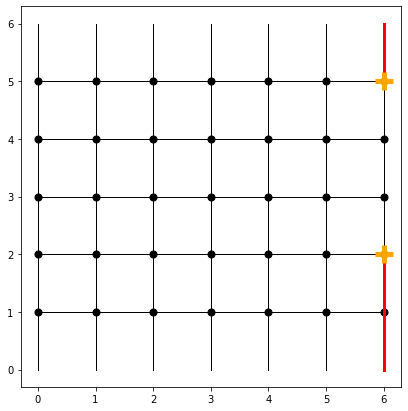

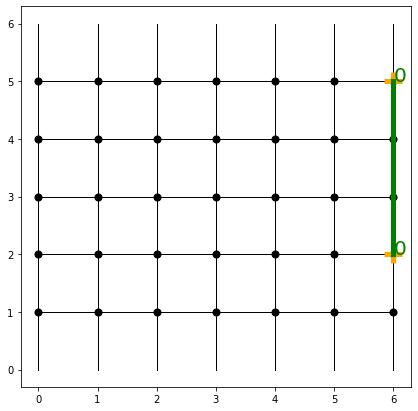

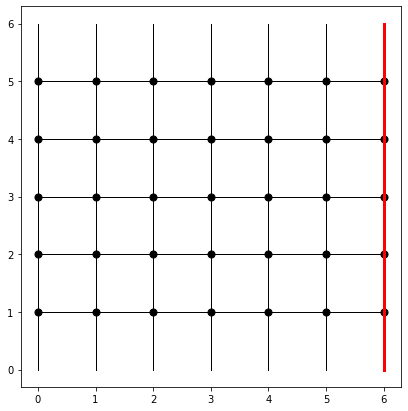

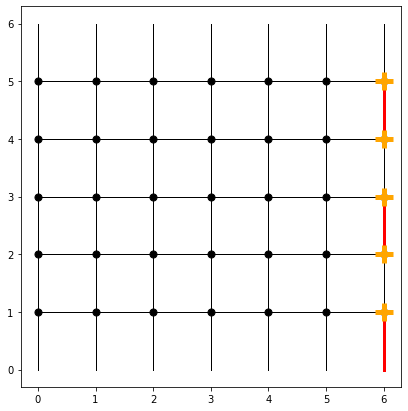

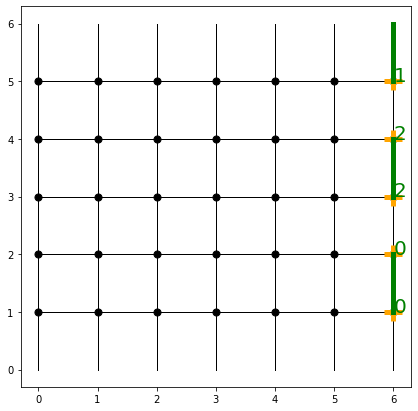

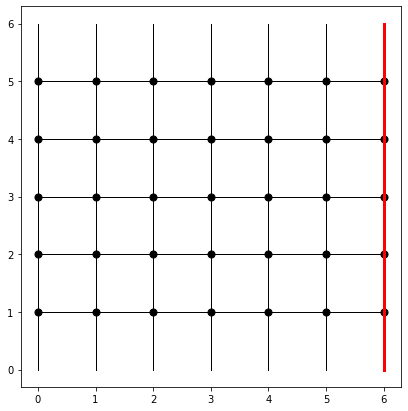

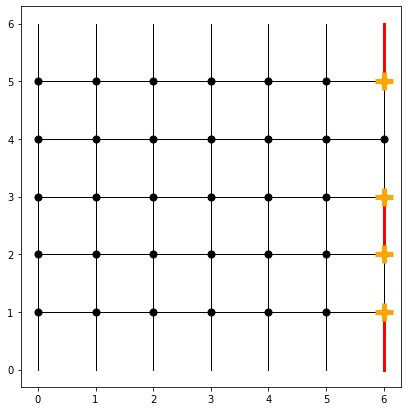

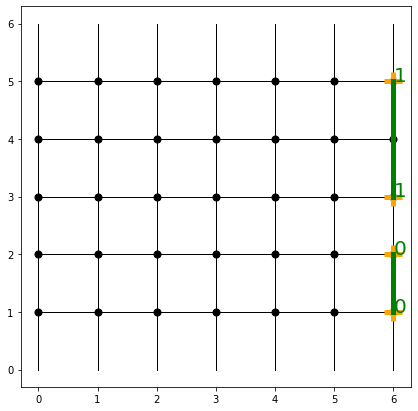

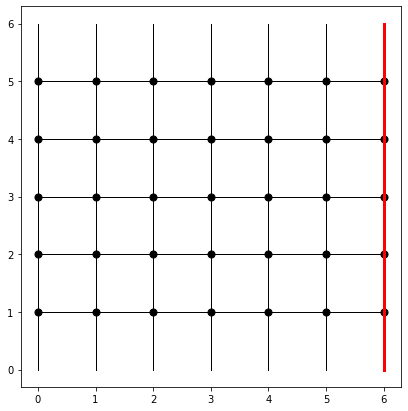

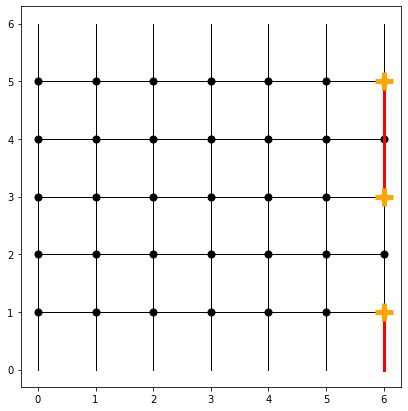

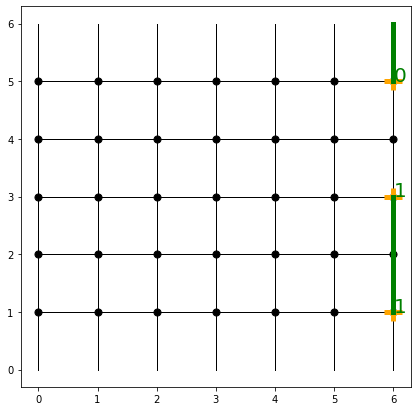

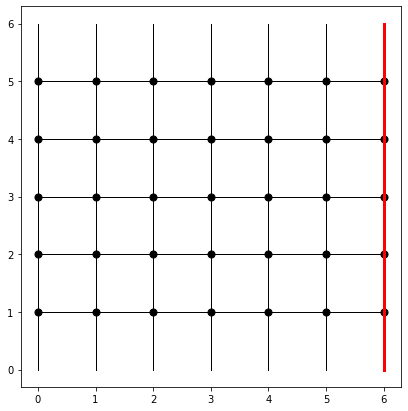

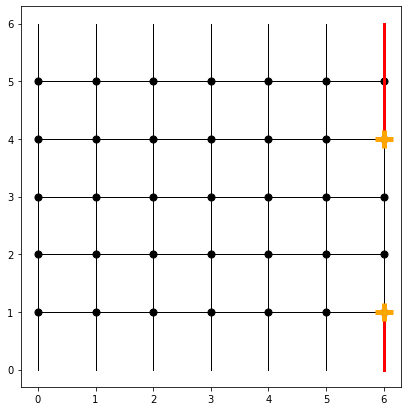

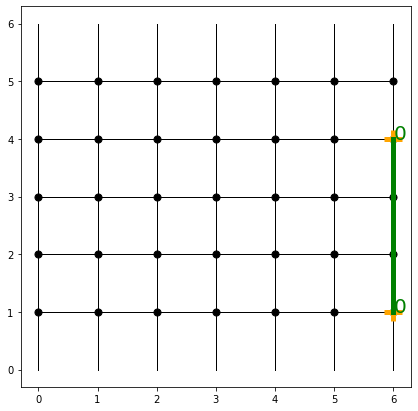

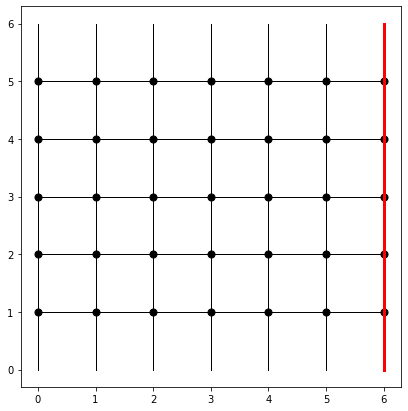

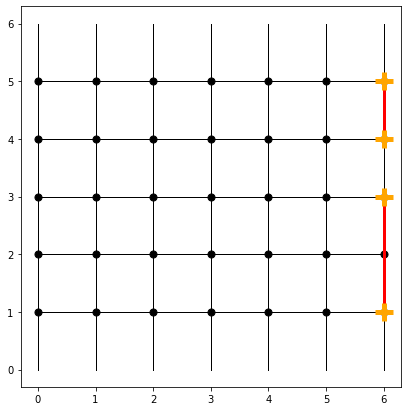

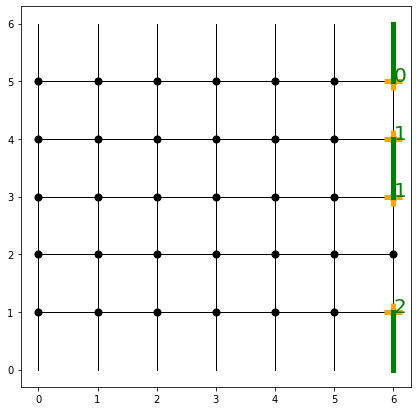

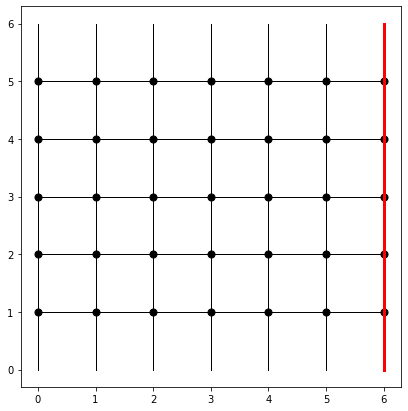

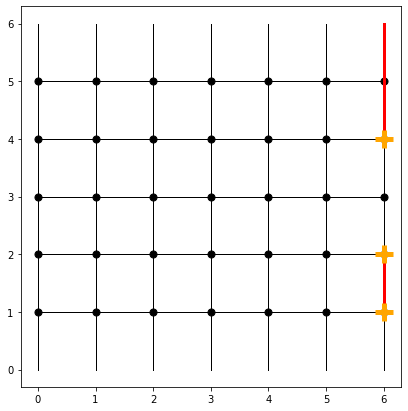

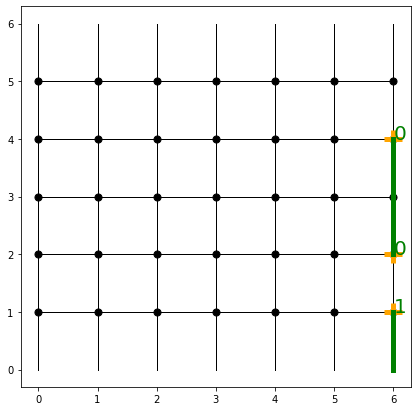

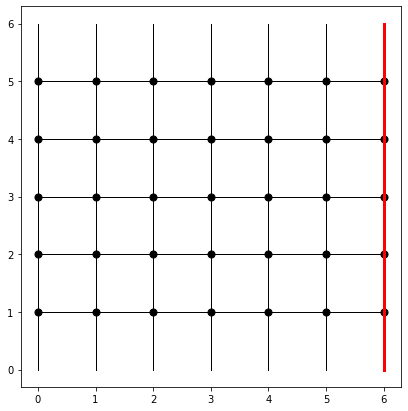

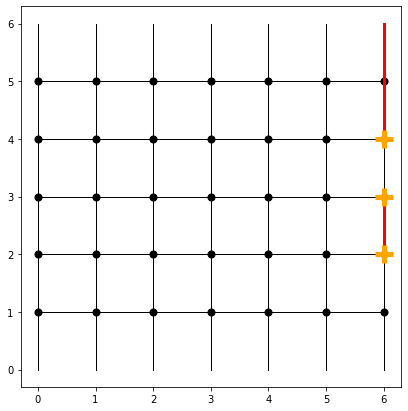

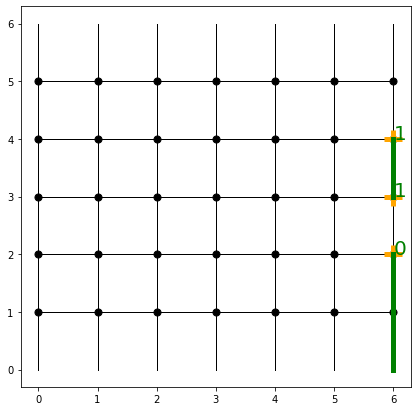

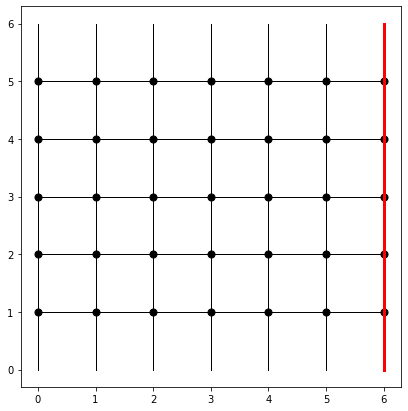

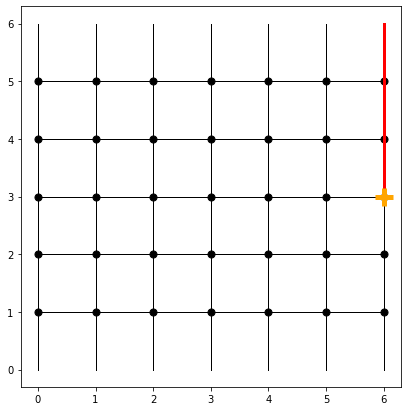

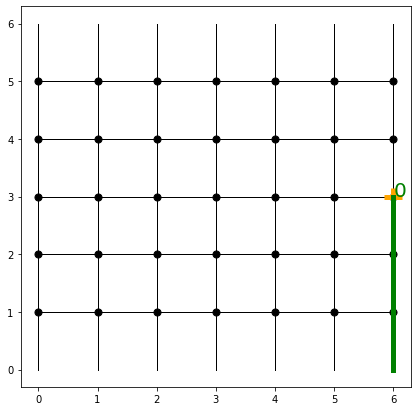

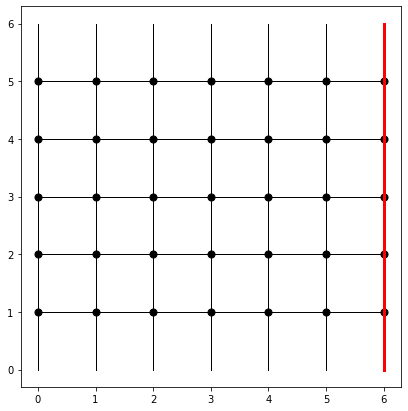

In [9]:
print(len(bad_error_chains))
for errors in bad_error_chains:
    lattice.reset()
    for edge in errors:
        lattice.apply_edge_operator(edge)
    syndrome = lattice.measure_syndrome()
    plot_planar_code(planar_code, plot_dual=False, show_errors=True, show_syndrome=True)
    plot_matchings(lattice, syndrome, pathfinding='manhattan')
    matching, paths = min_weight_syndrome_matching(lattice, syndrome, pathfinding='manhattan')
    for path in paths:
        lattice.apply_edge_operators(path)
    plot_planar_code(planar_code, plot_dual=False, show_errors=True, show_syndrome=True)

In [ ]:
lattice = planar_code.primal
syndrome = lattice.measure_syndrome()
graph, _ = syndrome_to_matching_graph(lattice, syndrome)

fig, ax = plt.subplots(1,1,figsize=(6,6))
nx.drawing.nx_pylab.draw_networkx(
    graph, ax=ax,
    node_size=1200,
    node_color=3*['orange'] + 3*['blue'],
    edge_color='red',
    font_color='white',
    font_weight='bold'
)

plot_matchings(lattice, syndrome)

In [ ]:
lattice = PlanarLattice(8, 8, boundaries=(1,0), p=0.05)
lattice.apply_edge_operator((7, [3,4], 1))
lattice.apply_edge_operator(([5,6], 3, 0))
syndrome = lattice.measure_syndrome()
plot_matchings(lattice, syndrome, pathfinding='manhattan')
matchings, paths = min_weight_syndrome_matching(lattice, syndrome, pathfinding='manhattan')
print(paths)
for path in paths:
    lattice.apply_edge_operators(path)
lattice.detect_logical_errors()

In [ ]:
lattice = planar_code.primal
lattice.reset()
syndrome = planar_code.measure_syndrome()[0]

lattice.apply_edge_operator((0, slice(None), 1))
lattice.apply_edge_operator((slice(None), 2, 0))
plot_planar_code(planar_code, plot_dual=False, show_errors=True, show_syndrome=True)
print(lattice.detect_logical_errors())